<a href="https://colab.research.google.com/github/TitasDas/dozee_assignments/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2: Outlier removal

Outlier detection from a trend is a common data analysis technique used to identify data points that deviate significantly from the long-term or short-term trend or pattern in a dataset. An outlier is an observation that is notably different from other/nearby observations, and it can indicate errors, anomalies, or important insights in the data.

### Problem Statement: Write a function which removes outleir points in a 1D trend data provided

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(4)

In [ ]:
def generate_trend_with_outliers():
    segment_nos = np.random.randint(25,50)
    slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

    points=[]
    constant = (np.random.random()-0.5)*100
    for i in range(segment_nos):
        points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
        constant = points[-1]
    return np.array(points)

array_with_outliers = generate_trend_with_outliers()

#### An example trend with outliers

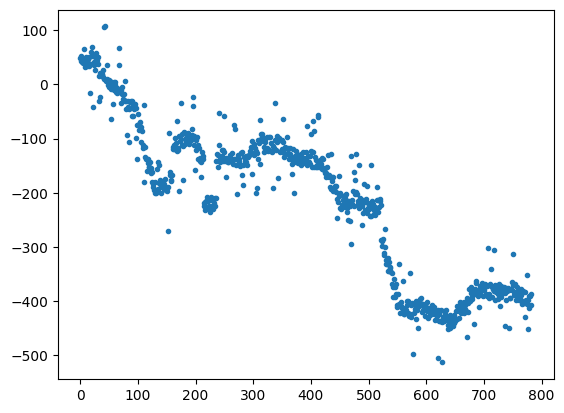

In [ ]:
plt.plot(generate_trend_with_outliers(),".")

# Solution Strategy :

The solution has been broken down into the following two steps.

**Part 1:**

- **(short quick sprint to solution)** Try two popular methods of outlier detection : The methods chosen are **Isolation forest (method 1)** and **one class Support Vector Machines (method 2)**. Interpret results through visual inspection.

**Part 2:**

- **(Longer more detailed solution)** Now, as a next step instead of only relying on visual inspection to interpret the results, lets come up with a formalized metric. The metric used here is similar to that of a classification problem - precision, recall and F1 score. In this step a more extensive analysis has been done on : **IF and SVM and performance improvements, Local Outlier Factor and its performance improvements, Autoencoders+IF and its performance improvements, Density Based Scan and its performance improvements.** By performance improvements, hyperparameter tuning is mostly demonstrated.

- In the **final part of 2 i.e in 2.c** all methods are compared , first with assumptions about their labels or with using labelled data, then without any labels. In some depending on the time left, I have also tried optimizations.

**Part 3:**
- This is a custom solution using density based clustering of sets, this is only to be considered as a complimentary work to my solutions in part 1 and part 2.

**Note 1:**

  An additional note on metrics and why precision, recall and F1 score were chosen for this experiment.

- The various different metrics that can be used are : precision/recall/f1 score, AUC-ROC, Area under the precision recall curve AUC-PR, Matthews correlation coefficient (MCC)

- If a balanced measure that considers both positive and negative classes is sought, the F1 score or MCC might be deemed suitable. If greater emphasis is placed on the ranking of outliers, AUC-ROC or AUC-PR could be considered more appropriate.

**Note 2:**

Another note on how to estimate the optimum segmented window size for the signal.

- Inferences about the optimum segment window size can be made from the manner in which the segments are generated. Specifically, the length of each segment is chosen randomly between 20 and 40 (np.random.randint(20,41)). Consequently, a range of around 30 to 40 could serve as a suitable starting point for determining the optimum segment window size, as it would adequately capture the characteristics of each segment. For my experimentation I have considered 40 and have used this for the last approach that is when autoencoders and isolation forests have been combined.

**Note 3:**

There have been places and an entire section where I have used labelled data which was generated or an assumption was made and the data was labelled according to it. The rationale behind this is even though the problem given was structured in a certain way, I changed it to check the robustness of the algorithms or models I was going to be proposing.

- Labelled data was used to check how performance metrics would measure up for each of the models used.
- While labelling there is a section towards the end where I instead of labelling the data during generation, generate unlabelled data and then make an assumption that the entire data has no outliers and have used and measured the models. This may sound unreasonable but if done uniformly for all models can be used to make a reasonable comparison between the models as I am making this assumption for all of them collectively.

***
**Final Answer** :
The final model that I would propose to solve this problem would be a combination of autoencoder + isolation forest , one example experiment (with constraints and assumptions of my own) generated the following numbers for performance metrics (even though the solution was going to be qualitatively evaluated I built a more formal metric and used an assumption about the labelling to be able to compare the approaches as a more concrete proof for my proposal, however the plots and unlabelled approach is also available for visual inspection). Through both the **combination of Autoencoder + Isolation Forest wins**.  

 - Autoencoder + Isolation Forest : Precision: 1.0
Recall: 0.8951132300357568
F1 Score: 0.9446540880503144

- Isolation forest : Precision: 1.0
Recall: 0.89920724801812
F1 Score: 0.9469290399522958

- SVMs :

- Isolation Forest + SVMs : Precision: 1.0
Recall: 0.7212449255751014
F1 Score: 0.8380503144654088

- LSTM : Precision: 1.0
Recall: 0.95
F1 Score: 0.9743589743589742

Collection of plots - https://docs.google.com/document/d/120e3lrRHrk7QX4QeoX0gpkUZO8U7cEJQHvgsunL4T6A/edit?usp=sharing

## Part 1 - The two methods are implemented and the performance is only evaluated through visual inspection.


### Method 1 : Using Isolation Forest

- the contamination parameter can be manipulated and optimized however going with "auto" for now

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
def remove_outliers(array_with_outliers):
    # Write your code here
    # There is no quantitive validation for this question
    # Your solution will be qualitatively validated by comparing plots with/without outliers

    array_with_outliers = array_with_outliers.reshape(-1, 1)
    clf = IsolationForest(contamination='auto', random_state=42)
    clf.fit(array_with_outliers)
    pred = clf.predict(array_with_outliers)
    array_without_outliers = array_with_outliers[pred == 1]
    array_without_outliers = array_without_outliers.reshape(-1)

    return array_without_outliers

In [ ]:
array_with_outliers = generate_trend_with_outliers()

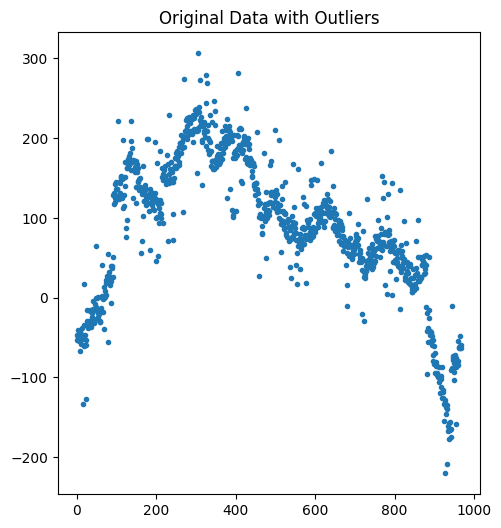

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Data with Outliers")
plt.plot(array_with_outliers, ".")

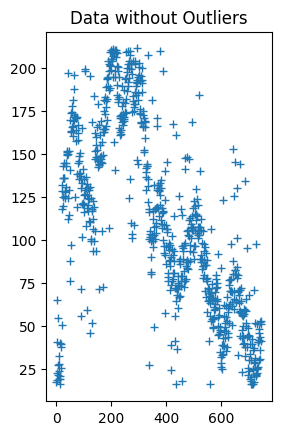

In [ ]:
plt.subplot(1, 2, 2)
plt.title("Data without Outliers")
plt.plot(remove_outliers(array_with_outliers), "+")
plt.show()

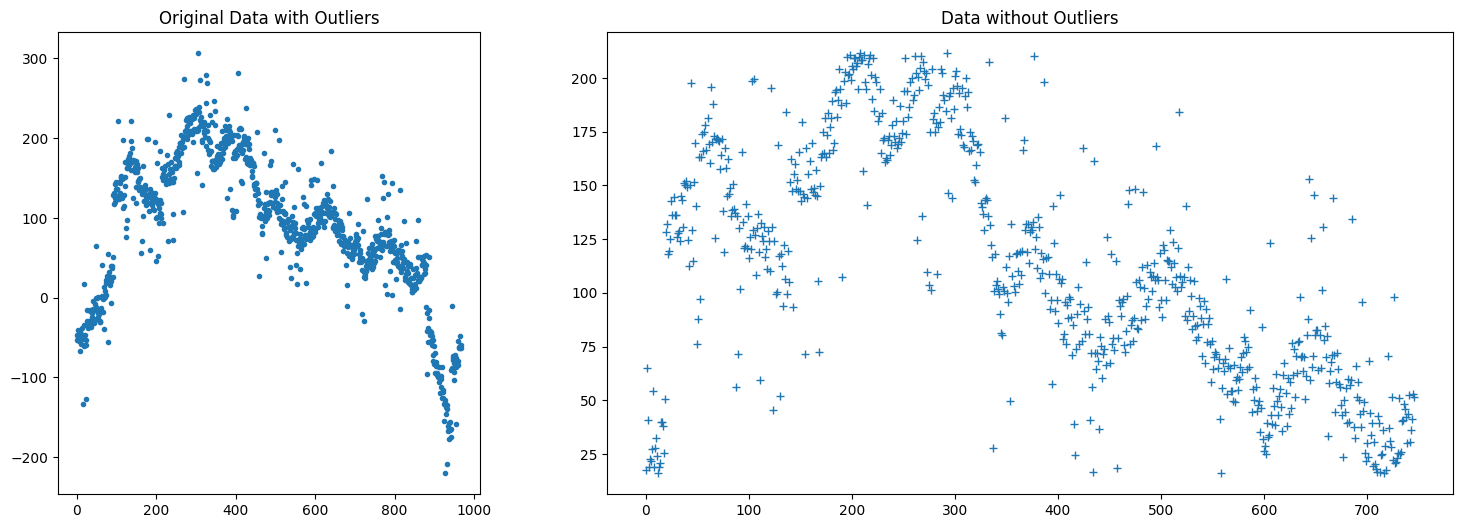

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

axs[0].set_title("Original Data with Outliers")
axs[0].plot(array_with_outliers, ".")

axs[1].set_title("Data without Outliers")
axs[1].plot(remove_outliers(array_with_outliers), "+")

plt.show()

### Method 2 : Using one class SVMs

- Here I have used a RBF kernel. The nu parameter is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.

In [ ]:
from sklearn.svm import OneClassSVM

def remove_outliers(array_with_outliers):
    array_with_outliers = array_with_outliers.reshape(-1, 1)
    clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(array_with_outliers)
    pred = clf.predict(array_with_outliers)
    array_without_outliers = array_with_outliers[pred == 1]
    array_without_outliers = array_without_outliers.reshape(-1)
    return array_without_outliers

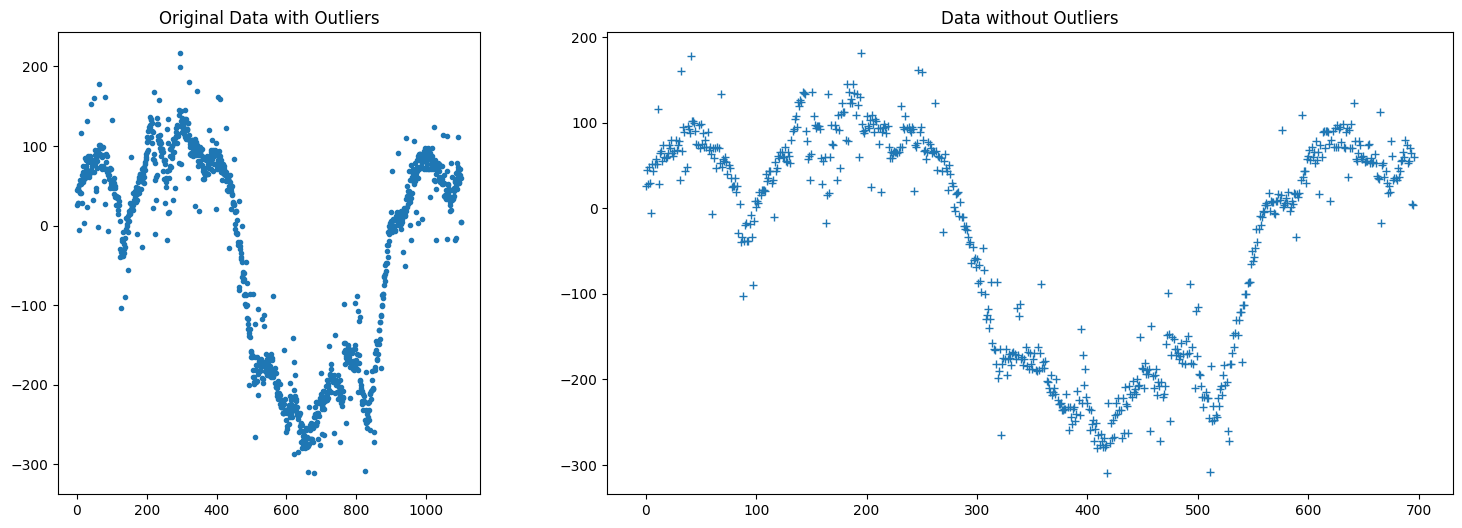

In [ ]:
array_with_outliers = generate_trend_with_outliers()
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})
axs[0].set_title("Original Data with Outliers")
axs[0].plot(array_with_outliers, ".")
axs[1].set_title("Data without Outliers")
axs[1].plot(remove_outliers(array_with_outliers), "+")
plt.show()

## Part 2: The same two methods are implemented but a more formalized performance metric is used.

### Part 2.a: Using a formalized metric to compare isolation forest and SVMs

- Generate the main trend without outliers. Intentionally introduce some outliers. Label the data points: 1 for outliers and 0 for inliers.
- Apply both the Isolation Forest and One-Class SVM methods to detect outliers, and then calculate precision, recall, and F1-score for both methods.
- In the plot : RED = outliers and BLUE = inliers
&
Labels 0 = inlier
Labels 1 = Outlier

In [ ]:
def generate_synthetic_data_with_labels():
    segment_nos = np.random.randint(25, 50)
    slopes = [np.tan((np.random.random() - 0.5) * 2.7) for _ in range(segment_nos)]

    points = []
    labels = []  # 0 for inliers, 1 for outliers
    constant = (np.random.random() - 0.5) * 100

    for i in range(segment_nos):
        for j in range(1, np.random.randint(20, 41)):
            point = constant + (slopes[i] * j)
            noise = 30 * (np.random.random() - 0.5) * (1 + 5 * (np.random.random() > 0.8))
            point += noise

            if abs(noise) > 30:  # If the noise is large, label it as an outlier
                labels.append(1)
            else:
                labels.append(0)

            points.append(point)
        constant = points[-1]

    return np.array(points), np.array(labels)

# Generate synthetic data and labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

In [ ]:
# Function to remove outliers using Isolation Forest
def remove_outliers_iforest(array):
    array = array.reshape(-1, 1)
    clf = IsolationForest(contamination='auto', random_state=42)
    clf.fit(array)
    pred = clf.predict(array)
    return (pred == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

# Function to remove outliers using One-Class SVM
def remove_outliers_svm(array):
    array = array.reshape(-1, 1)
    clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(array)
    pred = clf.predict(array)
    return (pred == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

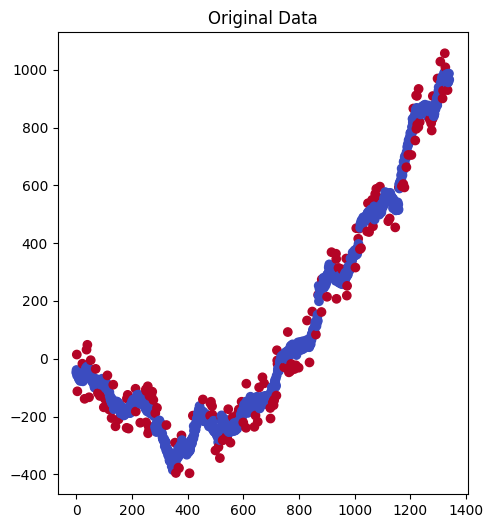

In [ ]:
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')

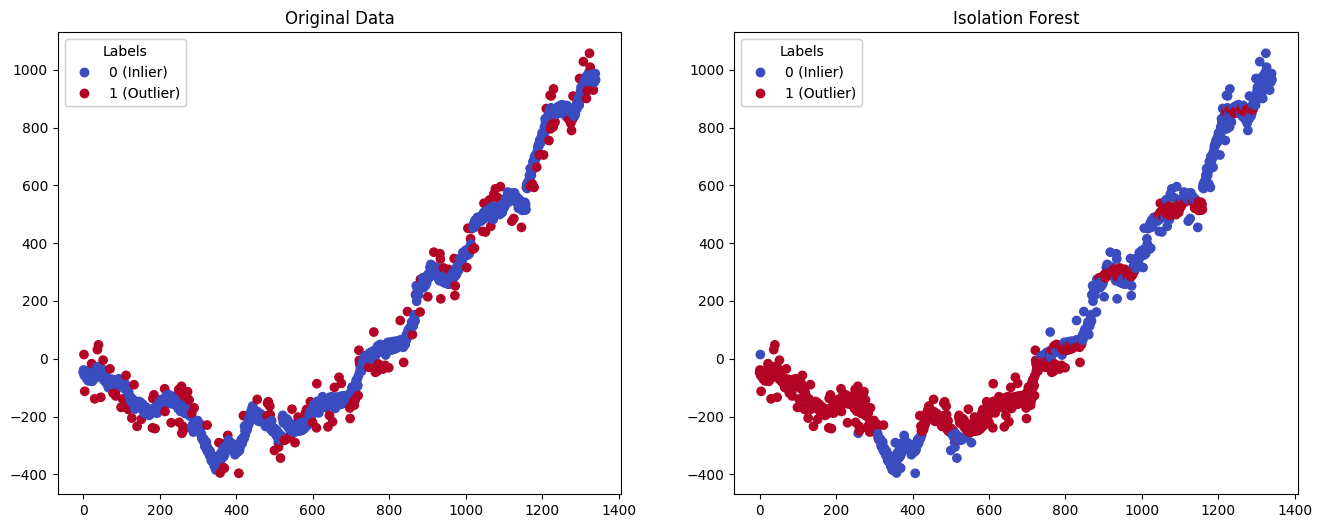

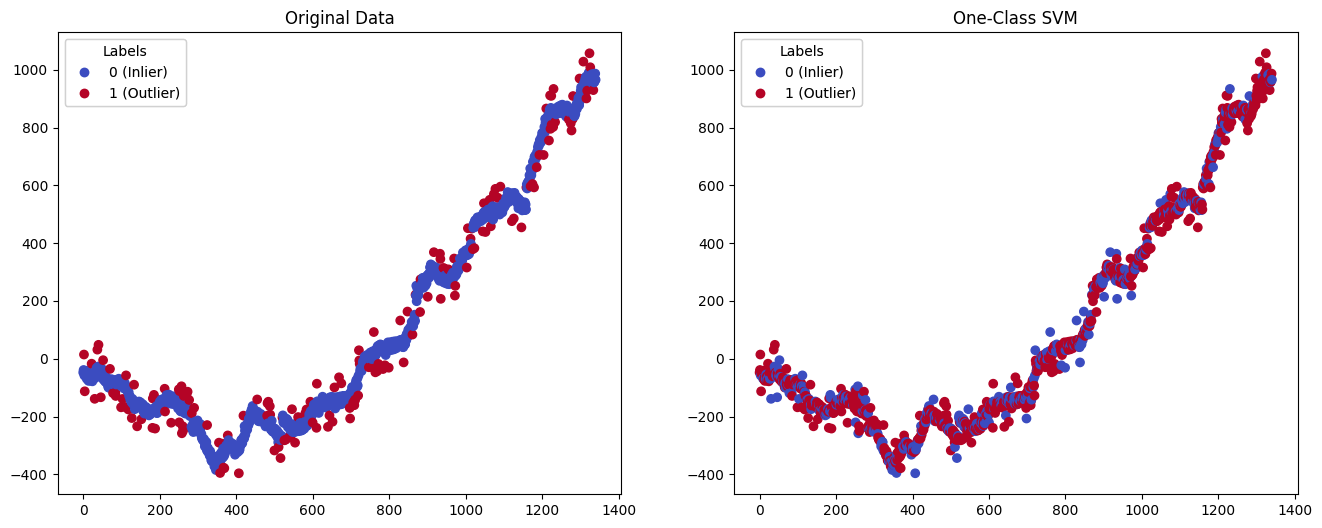

In [ ]:
# Create first set of subplots for Original and Isolation Forest
fig1, axs1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs1[0].set_title("Original Data")
scatter1 = axs1[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs1[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[0].add_artist(legend1)

# Apply Isolation Forest method and plot
predicted_outliers_iforest = remove_outliers_iforest(array_with_outliers)
axs1[1].set_title("Isolation Forest")
scatter2 = axs1[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=predicted_outliers_iforest, cmap='coolwarm')
legend2 = axs1[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[1].add_artist(legend2)

plt.show()

# Create second set of subplots for Original and One-Class SVM
fig2, axs2 = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs2[0].set_title("Original Data")
scatter3 = axs2[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend3 = axs2[0].legend(handles=scatter3.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs2[0].add_artist(legend3)

# Apply One-Class SVM method and plot
predicted_outliers_svm = remove_outliers_svm(array_with_outliers)
axs2[1].set_title("One-Class SVM")
scatter4 = axs2[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=predicted_outliers_svm, cmap='coolwarm')
legend4 = axs2[1].legend(handles=scatter4.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs2[1].add_artist(legend4)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate metrics for Isolation Forest
precision_iforest = precision_score(true_outliers, predicted_outliers_iforest)
recall_iforest = recall_score(true_outliers, predicted_outliers_iforest)
f1_iforest = f1_score(true_outliers, predicted_outliers_iforest)

print("Isolation Forest Metrics:")
print(f"Precision: {precision_iforest}")
print(f"Recall: {recall_iforest}")
print(f"F1 Score: {f1_iforest}")

# Calculate metrics for One-Class SVM
precision_svm = precision_score(true_outliers, predicted_outliers_svm)
recall_svm = recall_score(true_outliers, predicted_outliers_svm)
f1_svm = f1_score(true_outliers, predicted_outliers_svm)

print("\nOne-Class SVM Metrics:")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Isolation Forest Metrics:
Precision: 0.10856453558504221
Recall: 0.5325443786982249
F1 Score: 0.18036072144288579

One-Class SVM Metrics:
Precision: 0.1334106728538283
Recall: 0.6804733727810651
F1 Score: 0.22308438409311346


#### Performance improvement

- Hyperparameter tuning using gridsearch
- Ensemble Methods: Combine multiple models to make a final prediction, done extensively with a combination of autoencoder and isolation forest in "method 2: a shot at improving the F1 score using different methods"

##### Hyperparameter tuning

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

warnings.filterwarnings('ignore')

# Generate synthetic data and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Hyperparameter grid for Isolation Forest
param_grid_iforest = {
    'contamination': ['auto', 0.1, 0.2, 0.3],
    'max_samples': ['auto', 128, 256, 512],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV for Isolation Forest
grid_iforest = GridSearchCV(IsolationForest(random_state=42), param_grid_iforest, scoring='f1', cv=3)
grid_iforest.fit(array_with_outliers.reshape(-1, 1), true_outliers)

# Get the best model for Isolation Forest
best_iforest = grid_iforest.best_estimator_

# Hyperparameter grid for One-Class SVM
param_grid_svm = {
    'nu': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [0.01, 0.1, 1]
}

# Initialize GridSearchCV for One-Class SVM
grid_svm = GridSearchCV(OneClassSVM(), param_grid_svm, scoring='f1', cv=3)
grid_svm.fit(array_with_outliers.reshape(-1, 1), true_outliers)

# Get the best model for One-Class SVM
best_svm = grid_svm.best_estimator_

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Use the best Isolation Forest model to make predictions
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
pred_iforest = (pred_iforest == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

# Calculate metrics for Isolation Forest
precision_iforest = precision_score(true_outliers, pred_iforest)
recall_iforest = recall_score(true_outliers, pred_iforest)
f1_iforest = f1_score(true_outliers, pred_iforest)

print("Isolation Forest Metrics (After Tuning):")
print(f"Precision: {precision_iforest}")
print(f"Recall: {recall_iforest}")
print(f"F1 Score: {f1_iforest}")

# Use the best One-Class SVM model to make predictions
pred_svm = best_svm.predict(array_with_outliers.reshape(-1, 1))
pred_svm = (pred_svm == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

# Calculate metrics for One-Class SVM
precision_svm = precision_score(true_outliers, pred_svm)
recall_svm = recall_score(true_outliers, pred_svm)
f1_svm = f1_score(true_outliers, pred_svm)

print("\nOne-Class SVM Metrics (After Tuning):")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

##### Ensemble method using a voting classifier

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Make predictions using the best models for Isolation Forest and One-Class SVM
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
pred_svm = best_svm.predict(array_with_outliers.reshape(-1, 1))

# Convert to 0 for inliers and 1 for outliers
pred_iforest = (pred_iforest == 1).astype(int)
pred_svm = (pred_svm == 1).astype(int)

# Custom ensemble: Take a majority vote
ensemble_predictions = np.round((pred_iforest + pred_svm) / 2.0).astype(int)

# Calculate metrics for the ensemble method
precision_ensemble = precision_score(true_outliers, ensemble_predictions)
recall_ensemble = recall_score(true_outliers, ensemble_predictions)
f1_ensemble = f1_score(true_outliers, ensemble_predictions)

print("\nEnsemble Method Metrics:")
print(f"Precision: {precision_ensemble}")
print(f"Recall: {recall_ensemble}")
print(f"F1 Score: {f1_ensemble}")

Taking a weighted voting scheme
- F1 scores for the Isolation Forest and One-Class SVM models are used as weights for their respective predictions. These weights are normalized so that they sum to 1. Then, a weighted sum of the predictions is rounded to the nearest integer to get the final ensemble prediction.

In [ ]:
# taking a weighted voting scheme

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Make predictions using the best models for Isolation Forest and One-Class SVM
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
pred_svm = best_svm.predict(array_with_outliers.reshape(-1, 1))

# Convert to 0 for inliers and 1 for outliers
pred_iforest = (pred_iforest == 1).astype(int)
pred_svm = (pred_svm == 1).astype(int)

# Calculate F1 scores for each model to use as weights
f1_iforest = f1_score(true_outliers, pred_iforest)
f1_svm = f1_score(true_outliers, pred_svm)

# Normalize the weights so they sum to 1
total_weight = f1_iforest + f1_svm
weight_iforest = f1_iforest / total_weight
weight_svm = f1_svm / total_weight

# Custom ensemble: Take a weighted vote
ensemble_predictions = np.round(weight_iforest * pred_iforest + weight_svm * pred_svm).astype(int)

# Calculate metrics for the ensemble method
precision_ensemble = precision_score(true_outliers, ensemble_predictions)
recall_ensemble = recall_score(true_outliers, ensemble_predictions)
f1_ensemble = f1_score(true_outliers, ensemble_predictions)

print("\nEnsemble Method Metrics (Weighted Voting):")
print(f"Precision: {precision_ensemble}")
print(f"Recall: {recall_ensemble}")
print(f"F1 Score: {f1_ensemble}")

### Part 2.b : A shot at improving the F1 scores using different methods

- Try a LOF - Local Outlier Factor , typically used when datasets have a non uniform density distribution
- Try a combination of ensemble methods - for example combining isolation forest and autoencoders. Here also a demonstration has been done to show how varying the hidden layers and architecture of the autoencoder can yield slightly different results.

#### LOF : Local Outlier Factor , typically used when datasets have a non uniform density distribution

In [ ]:
# LOF
from sklearn.neighbors import LocalOutlierFactor

def remove_outliers_lof(array):
    array = array.reshape(-1, 1)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    pred = clf.fit_predict(array)
    return (pred == 1).astype(int)

In [ ]:
# Create first set of subplots for Original and LOF
fig1, axs1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs1[0].set_title("Original Data")
scatter1 = axs1[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs1[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[0].add_artist(legend1)

# Apply LOF method and plot
predicted_outliers_lof = remove_outliers_lof(array_with_outliers)
axs1[1].set_title("LOF")
scatter2 = axs1[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=predicted_outliers_lof, cmap='coolwarm')
legend2 = axs1[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs1[1].add_artist(legend2)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_new = precision_score(true_outliers, predicted_outliers_lof)
recall_new = recall_score(true_outliers, predicted_outliers_lof)
f1_new = f1_score(true_outliers, predicted_outliers_lof)

print("\nLOF Metrics:")
print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1 Score: {f1_new}")

Performance improvement of LOF:

- Bayesian Optimization is used to optimize the n_neighbors and contamination parameters of the LOF model. The objective function (lof_objective) computes the F1 score for given parameters. The optimizer then tries to maximize this F1 score. After finding the best parameters, we train the LOF model again with these optimized parameters and calculate the precision, recall, and F1 score.

In [ ]:
pip install bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score

# Objective function for Bayesian Optimization
def lof_objective(n_neighbors, contamination):
    lof = LocalOutlierFactor(n_neighbors=int(n_neighbors), contamination=float(contamination))
    pred = lof.fit_predict(array_with_outliers.reshape(-1, 1))
    pred = (pred == 1).astype(int)
    return f1_score(true_outliers, pred)

# Bayesian Optimization
optimizer = BayesianOptimization(
    f=lof_objective,
    pbounds={"n_neighbors": (5, 50), "contamination": (0.01, 0.5)},
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=15)

# Extract the best parameters
best_params = optimizer.max['params']
best_n_neighbors = int(best_params['n_neighbors'])
best_contamination = best_params['contamination']

# Train LOF with the best parameters
best_lof = LocalOutlierFactor(n_neighbors=best_n_neighbors, contamination=best_contamination)
pred_lof = best_lof.fit_predict(array_with_outliers.reshape(-1, 1))
pred_lof = (pred_lof == 1).astype(int)

# Calculate metrics for the optimized LOF model
precision_lof = precision_score(true_outliers, pred_lof)
recall_lof = recall_score(true_outliers, pred_lof)
f1_lof = f1_score(true_outliers, pred_lof)

print("\nOptimized LOF Metrics:")
print(f"Precision: {precision_lof}")
print(f"Recall: {recall_lof}")
print(f"F1 Score: {f1_lof}")

- Randomized Search with Cross-Validation for LOF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score

# Hyperparameter grid for LOF
param_dist = {'n_neighbors': list(range(5, 51)), 'contamination': [x/100.0 for x in range(1, 51)]}

# Initialize RandomizedSearchCV for LOF
random_search_lof = RandomizedSearchCV(LocalOutlierFactor(), param_distributions=param_dist, scoring='f1', n_iter=50, cv=3)
random_search_lof.fit(array_with_outliers.reshape(-1, 1), true_outliers)

# Get the best model for LOF
best_lof = random_search_lof.best_estimator_

# Make predictions
pred_lof = best_lof.fit_predict(array_with_outliers.reshape(-1, 1))
pred_lof = (pred_lof == 1).astype(int)  # Convert to 0 for inliers and 1 for outliers

# Calculate metrics for LOF
precision_lof = precision_score(true_outliers, pred_lof)
recall_lof = recall_score(true_outliers, pred_lof)
f1_lof = f1_score(true_outliers, pred_lof)

print("\nLOF Metrics (After Randomized Search):")
print(f"Precision: {precision_lof}")
print(f"Recall: {recall_lof}")
print(f"F1 Score: {f1_lof}")

- Ensemble Methods for LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Create individual LOF models
lof1 = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof2 = LocalOutlierFactor(n_neighbors=30, contamination=0.2)
lof3 = LocalOutlierFactor(n_neighbors=40, contamination=0.3)

# Fit the LOF models and make predictions
pred1 = lof1.fit_predict(array_with_outliers.reshape(-1, 1))
pred2 = lof2.fit_predict(array_with_outliers.reshape(-1, 1))
pred3 = lof3.fit_predict(array_with_outliers.reshape(-1, 1))

# Convert to 0 for inliers and 1 for outliers
pred1 = (pred1 == 1).astype(int)
pred2 = (pred2 == 1).astype(int)
pred3 = (pred3 == 1).astype(int)

# Define weights for each model
weights = [0.5, 0.3, 0.2]

# Create an ensemble prediction (weighted voting)
ensemble_predictions = np.round((weights[0]*pred1 + weights[1]*pred2 + weights[2]*pred3)).astype(int)

# Calculate metrics for the ensemble method
precision_ensemble = precision_score(true_outliers, ensemble_predictions)
recall_ensemble = recall_score(true_outliers, ensemble_predictions)
f1_ensemble = f1_score(true_outliers, ensemble_predictions)

print("\nEnsemble Method Metrics (Weighted):")
print(f"Precision: {precision_ensemble}")
print(f"Recall: {recall_ensemble}")
print(f"F1 Score: {f1_ensemble}")

#### Autoencoders + Isolation Forests
- Trying autoencoders + isolation forests

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf

In [ ]:
# Generate synthetic data and true outlier labels (use your existing function)
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Step 1: Use Isolation Forest to get preliminary set of inliers and outliers
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(array_with_outliers.reshape(-1, 1))
pred_iforest = clf.predict(array_with_outliers.reshape(-1, 1))

# Step 2: Train an Autoencoder only on the inliers
inliers = array_with_outliers[pred_iforest == 1]

# Define the Autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(inliers, inliers, epochs=50, batch_size=32, verbose=0)

# Step 3: Use the Autoencoder to reconstruct all data points
reconstructed = model.predict(array_with_outliers)
reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)

# Step 4: Label points with high reconstruction errors as outliers
threshold = np.percentile(reconstruction_error, 95)  # You can tune this threshold
pred_autoencoder = (reconstruction_error > threshold).astype(int)

# Combine the predictions from Isolation Forest and Autoencoder
combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)

# Calculate metrics for the combined method
precision_combined = precision_score(true_outliers, combined_pred)
recall_combined = recall_score(true_outliers, combined_pred)
f1_combined = f1_score(true_outliers, combined_pred)

print("\nCombined Method Metrics:")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Plot original data
axs[0].set_title("Original Data")
scatter1 = axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[0].add_artist(legend1)

# Plot data labeled by Isolation Forest
axs[1].set_title("Isolation Forest")
scatter2 = axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=(pred_iforest == -1).astype(int), cmap='coolwarm')
legend2 = axs[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[1].add_artist(legend2)

# Plot data labeled by Autoencoder
axs[2].set_title("Autoencoder")
scatter3 = axs[2].scatter(range(len(array_with_outliers)), array_with_outliers, c=pred_autoencoder, cmap='coolwarm')
legend3 = axs[2].legend(handles=scatter3.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[2].add_artist(legend3)

# Plot data labeled by Combined Method
axs[3].set_title("Combined Method")
scatter4 = axs[3].scatter(range(len(array_with_outliers)), array_with_outliers, c=combined_pred, cmap='coolwarm')
legend4 = axs[3].legend(handles=scatter4.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[3].add_artist(legend4)

plt.show()

#### Autoencoders and Isolation Forest - slightly higher number of hidden layers

- Try the same ensemble approach except now change the architecture of the autoencoder to include - 2 hidden layers for encoder and 2 layers for decoder

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf

# Generate synthetic data and true outlier labels (use your existing function)
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Step 1: Use Isolation Forest to get preliminary set of inliers and outliers
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(array_with_outliers.reshape(-1, 1))
pred_iforest = clf.predict(array_with_outliers.reshape(-1, 1))

# Step 2: Train an Autoencoder only on the inliers
inliers = array_with_outliers[pred_iforest == 1]

# Define the Autoencoder model with more complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(inliers, inliers, epochs=50, batch_size=32, verbose=0)

# Step 3: Use the Autoencoder to reconstruct all data points
reconstructed = model.predict(array_with_outliers)
reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)

# Step 4: Label points with high reconstruction errors as outliers
threshold = np.percentile(reconstruction_error, 95)  # You can tune this threshold
pred_autoencoder = (reconstruction_error > threshold).astype(int)

# Combine the predictions from Isolation Forest and Autoencoder
combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)

# Calculate metrics for the combined method
precision_combined = precision_score(true_outliers, combined_pred)
recall_combined = recall_score(true_outliers, combined_pred)
f1_combined = f1_score(true_outliers, combined_pred)

print("\nCombined Method Metrics:")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Plot original data
axs[0].set_title("Original Data")
scatter1 = axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[0].add_artist(legend1)

# Plot data labeled by Isolation Forest
axs[1].set_title("Isolation Forest")
scatter2 = axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=(pred_iforest == -1).astype(int), cmap='coolwarm')
legend2 = axs[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[1].add_artist(legend2)

# Plot data labeled by Autoencoder
axs[2].set_title("Autoencoder")
scatter3 = axs[2].scatter(range(len(array_with_outliers)), array_with_outliers, c=pred_autoencoder, cmap='coolwarm')
legend3 = axs[2].legend(handles=scatter3.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[2].add_artist(legend3)

# Plot data labeled by Combined Method
axs[3].set_title("Combined Method")
scatter4 = axs[3].scatter(range(len(array_with_outliers)), array_with_outliers, c=combined_pred, cmap='coolwarm')
legend4 = axs[3].legend(handles=scatter4.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[3].add_artist(legend4)

plt.show()

Performance Improvement :
- Trying to finetune using Bayesian optimization for hyperparameter tuning of both the isolation forest and autoencoder. (using scikit-optimize)

In [ ]:
!pip install scikit-optimize
!pip install tensorflow

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from skopt import BayesSearchCV
import tensorflow as tf

# Generate synthetic data and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Check if true_outliers only contains two unique values (0 and 1)
unique_values_true_outliers = set(true_outliers)
if unique_values_true_outliers == {0, 1}:
    print("true_outliers contains only 0s and 1s.")
else:
    print(f"true_outliers contains unexpected unique values: {unique_values_true_outliers}")

# Check if pred_iforest only contains two unique values (0 and 1)
unique_values_pred_iforest = set(pred_iforest)
if unique_values_pred_iforest == {0, 1}:
    print("pred_iforest contains only 0s and 1s.")
else:
    print(f"pred_iforest contains unexpected unique values: {unique_values_pred_iforest}")

# Check if pred_autoencoder only contains two unique values (0 and 1)
unique_values_pred_autoencoder = set(pred_autoencoder)
if unique_values_pred_autoencoder == {0, 1}:
    print("pred_autoencoder contains only 0s and 1s.")
else:
    print(f"pred_autoencoder contains unexpected unique values: {unique_values_pred_autoencoder}")

# Check if combined_pred only contains two unique values (0 and 1)
unique_values_combined_pred = set(combined_pred)
if unique_values_combined_pred == {0, 1}:
    print("combined_pred contains only 0s and 1s.")
else:
    print(f"combined_pred contains unexpected unique values: {unique_values_combined_pred}")

# Bayesian Optimization for Isolation Forest
param_space = {
    'contamination': (0.01, 0.5, 'uniform'),
    'max_samples': (100, 500),
    'n_estimators': (50, 200)
}

opt_iforest = BayesSearchCV(
    IsolationForest(random_state=42),
    param_space,
    n_iter=50,
    cv=3,
    scoring='f1'
)

opt_iforest.fit(array_with_outliers.reshape(-1, 1), true_outliers)
best_iforest = opt_iforest.best_estimator_

# Use the best Isolation Forest model to make preliminary predictions
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
inliers = array_with_outliers[pred_iforest == 1]

# Bayesian Optimization for Autoencoder
def autoencoder_objective(params):
    layer1, layer2, epochs, batch_size = params
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(layer2, activation='relu'),
        tf.keras.layers.Dense(layer1, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)
    reconstructed = model.predict(array_with_outliers)
    reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)
    threshold = np.percentile(reconstruction_error, 95)
    pred_autoencoder = (reconstruction_error > threshold).astype(int)
    return -f1_score(true_outliers, pred_autoencoder)

from skopt import gp_minimize

space = [(32, 128),  # layer1
         (16, 64),   # layer2
         (10, 50),   # epochs
         (16, 64)]   # batch_size

res = gp_minimize(autoencoder_objective, space, n_calls=50)
best_params = res.x
layer1, layer2, epochs, batch_size = best_params

# Train the best Autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(layer2, activation='relu'),
    tf.keras.layers.Dense(layer1, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)

# Combine the predictions from Isolation Forest and Autoencoder
combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)

# Calculate metrics for the combined method
precision_combined = precision_score(true_outliers, combined_pred, average='weighted')
recall_combined = recall_score(true_outliers, combined_pred)
f1_combined = f1_score(true_outliers, combined_pred)

print("\nCombined Method Metrics:")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

In [ ]:
# a custom scorer is needed

from sklearn.metrics import make_scorer

def custom_f1(y_true, y_pred):
    y_pred = (y_pred == -1).astype(int)  # Convert to 0 for inliers and 1 for outliers
    return f1_score(y_true, y_pred)



In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from skopt import BayesSearchCV
import tensorflow as tf

# Generate synthetic data and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Check if true_outliers only contains two unique values (0 and 1)
unique_values_true_outliers = set(true_outliers)
if unique_values_true_outliers == {0, 1}:
    print("true_outliers contains only 0s and 1s.")
else:
    print(f"true_outliers contains unexpected unique values: {unique_values_true_outliers}")

# Check if pred_iforest only contains two unique values (0 and 1)
unique_values_pred_iforest = set(pred_iforest)
if unique_values_pred_iforest == {0, 1}:
    print("pred_iforest contains only 0s and 1s.")
else:
    print(f"pred_iforest contains unexpected unique values: {unique_values_pred_iforest}")

# Check if pred_autoencoder only contains two unique values (0 and 1)
unique_values_pred_autoencoder = set(pred_autoencoder)
if unique_values_pred_autoencoder == {0, 1}:
    print("pred_autoencoder contains only 0s and 1s.")
else:
    print(f"pred_autoencoder contains unexpected unique values: {unique_values_pred_autoencoder}")

# Check if combined_pred only contains two unique values (0 and 1)
unique_values_combined_pred = set(combined_pred)
if unique_values_combined_pred == {0, 1}:
    print("combined_pred contains only 0s and 1s.")
else:
    print(f"combined_pred contains unexpected unique values: {unique_values_combined_pred}")

# Bayesian Optimization for Isolation Forest
param_space = {
    'contamination': (0.01, 0.5, 'uniform'),
    'max_samples': (100, 500),
    'n_estimators': (50, 200)
}

custom_f1_scorer = make_scorer(custom_f1, greater_is_better=True)

opt_iforest = BayesSearchCV(
    IsolationForest(random_state=42),
    param_space,
    n_iter=50,
    cv=3,
    scoring=custom_f1_scorer  # Use custom scorer here
)

opt_iforest.fit(array_with_outliers.reshape(-1, 1), true_outliers)
best_iforest = opt_iforest.best_estimator_

# Use the best Isolation Forest model to make preliminary predictions
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
inliers = array_with_outliers[pred_iforest == 1]

# Bayesian Optimization for Autoencoder
def autoencoder_objective(params):
    layer1, layer2, epochs, batch_size = params
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(layer2, activation='relu'),
        tf.keras.layers.Dense(layer1, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)
    reconstructed = model.predict(array_with_outliers)
    reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)
    threshold = np.percentile(reconstruction_error, 95)
    pred_autoencoder = (reconstruction_error > threshold).astype(int)
    return -f1_score(true_outliers, pred_autoencoder)

from skopt import gp_minimize

space = [(32, 128),  # layer1
         (16, 64),   # layer2
         (10, 50),   # epochs
         (16, 64)]   # batch_size

res = gp_minimize(autoencoder_objective, space, n_calls=50)
best_params = res.x
layer1, layer2, epochs, batch_size = best_params

# Train the best Autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(layer2, activation='relu'),
    tf.keras.layers.Dense(layer1, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)

# Combine the predictions from Isolation Forest and Autoencoder
combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)

# Calculate metrics for the combined method
precision_combined = precision_score(true_outliers, combined_pred, average='weighted')
recall_combined = recall_score(true_outliers, combined_pred)
f1_combined = f1_score(true_outliers, combined_pred)

print("\nCombined Method Metrics:")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

In [ ]:
# checking the shapes of the predictions and the true labels to debug the above error

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from skopt import BayesSearchCV
import tensorflow as tf

# Generate synthetic data and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Step 1: Check the Shapes
print("Shape of true_outliers:", true_outliers.shape)

# Bayesian Optimization for Isolation Forest
param_space = {
    'contamination': (0.01, 0.5, 'uniform'),
    'max_samples': (100, 500),
    'n_estimators': (50, 200)
}

custom_f1_scorer = make_scorer(custom_f1, greater_is_better=True)

opt_iforest = BayesSearchCV(
    IsolationForest(random_state=42),
    param_space,
    n_iter=50,
    cv=3,
    scoring=custom_f1_scorer  # Use custom scorer here
)

opt_iforest.fit(array_with_outliers.reshape(-1, 1), true_outliers)
best_iforest = opt_iforest.best_estimator_

# Use the best Isolation Forest model to make preliminary predictions
pred_iforest = best_iforest.predict(array_with_outliers.reshape(-1, 1))
inliers = array_with_outliers[pred_iforest == 1]

# Check the shapes of predictions
print("Shape of pred_iforest:", pred_iforest.shape)

# Bayesian Optimization for Autoencoder
def autoencoder_objective(params):
    layer1, layer2, epochs, batch_size = params
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(layer2, activation='relu'),
        tf.keras.layers.Dense(layer1, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)
    reconstructed = model.predict(array_with_outliers)
    reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)
    threshold = np.percentile(reconstruction_error, 95)
    pred_autoencoder = (reconstruction_error > threshold).astype(int)
    return -f1_score(true_outliers, pred_autoencoder)

from skopt import gp_minimize

space = [(32, 128),  # layer1
         (16, 64),   # layer2
         (10, 50),   # epochs
         (16, 64)]   # batch_size

res = gp_minimize(autoencoder_objective, space, n_calls=50)
best_params = res.x
layer1, layer2, epochs, batch_size = best_params

# Train the best Autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layer1, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(layer2, activation='relu'),
    tf.keras.layers.Dense(layer1, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(inliers, inliers, epochs=epochs, batch_size=batch_size, verbose=0)

# Get predictions from the Autoencoder
reconstructed = model.predict(array_with_outliers)
reconstruction_error = np.mean(np.abs(reconstructed - array_with_outliers.reshape(-1, 1)), axis=1)
threshold = np.percentile(reconstruction_error, 95)
pred_autoencoder = (reconstruction_error > threshold).astype(int)

# Check the shapes of predictions
print("Shape of pred_autoencoder:", pred_autoencoder.shape)

# Combine the predictions from Isolation Forest and Autoencoder
combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)

# Check the shapes of combined predictions
print("Shape of combined_pred:", combined_pred.shape)

# Calculate metrics for the combined method
precision_combined = precision_score(true_outliers, combined_pred, average='weighted')
recall_combined = recall_score(true_outliers, combined_pred)
f1_combined = f1_score(true_outliers, combined_pred)

print("\nCombined Method Metrics:")
print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

In [ ]:
# Plotting (just to see visually what the labelling looks like)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot actual labeled data
axs[0].scatter(np.arange(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
axs[0].set_title('Actual Labeled Data')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot data labeled by the outlier detector
axs[1].scatter(np.arange(len(array_with_outliers)), array_with_outliers, c=combined_pred, cmap='coolwarm')
axs[1].set_title('Data Labeled by Outlier Detector')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

### Part 2.c : A final collection of all approaches compared using metrics (labels or assumptions used) and visual inspection (with the original trend given in the problem statement).

- LSTM
- Autoencoders + Isolation Forest
- Isolation Forest
- One Class SVMs
- Isolation Forest + One Class SVMs

#### LSTMs (with unlabeled data but using a time window)

37/37 [==============================] - 1s 3ms/step
Precision: 1.0
Recall: 0.9498269896193772
F1 Score: 0.974267968056788


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


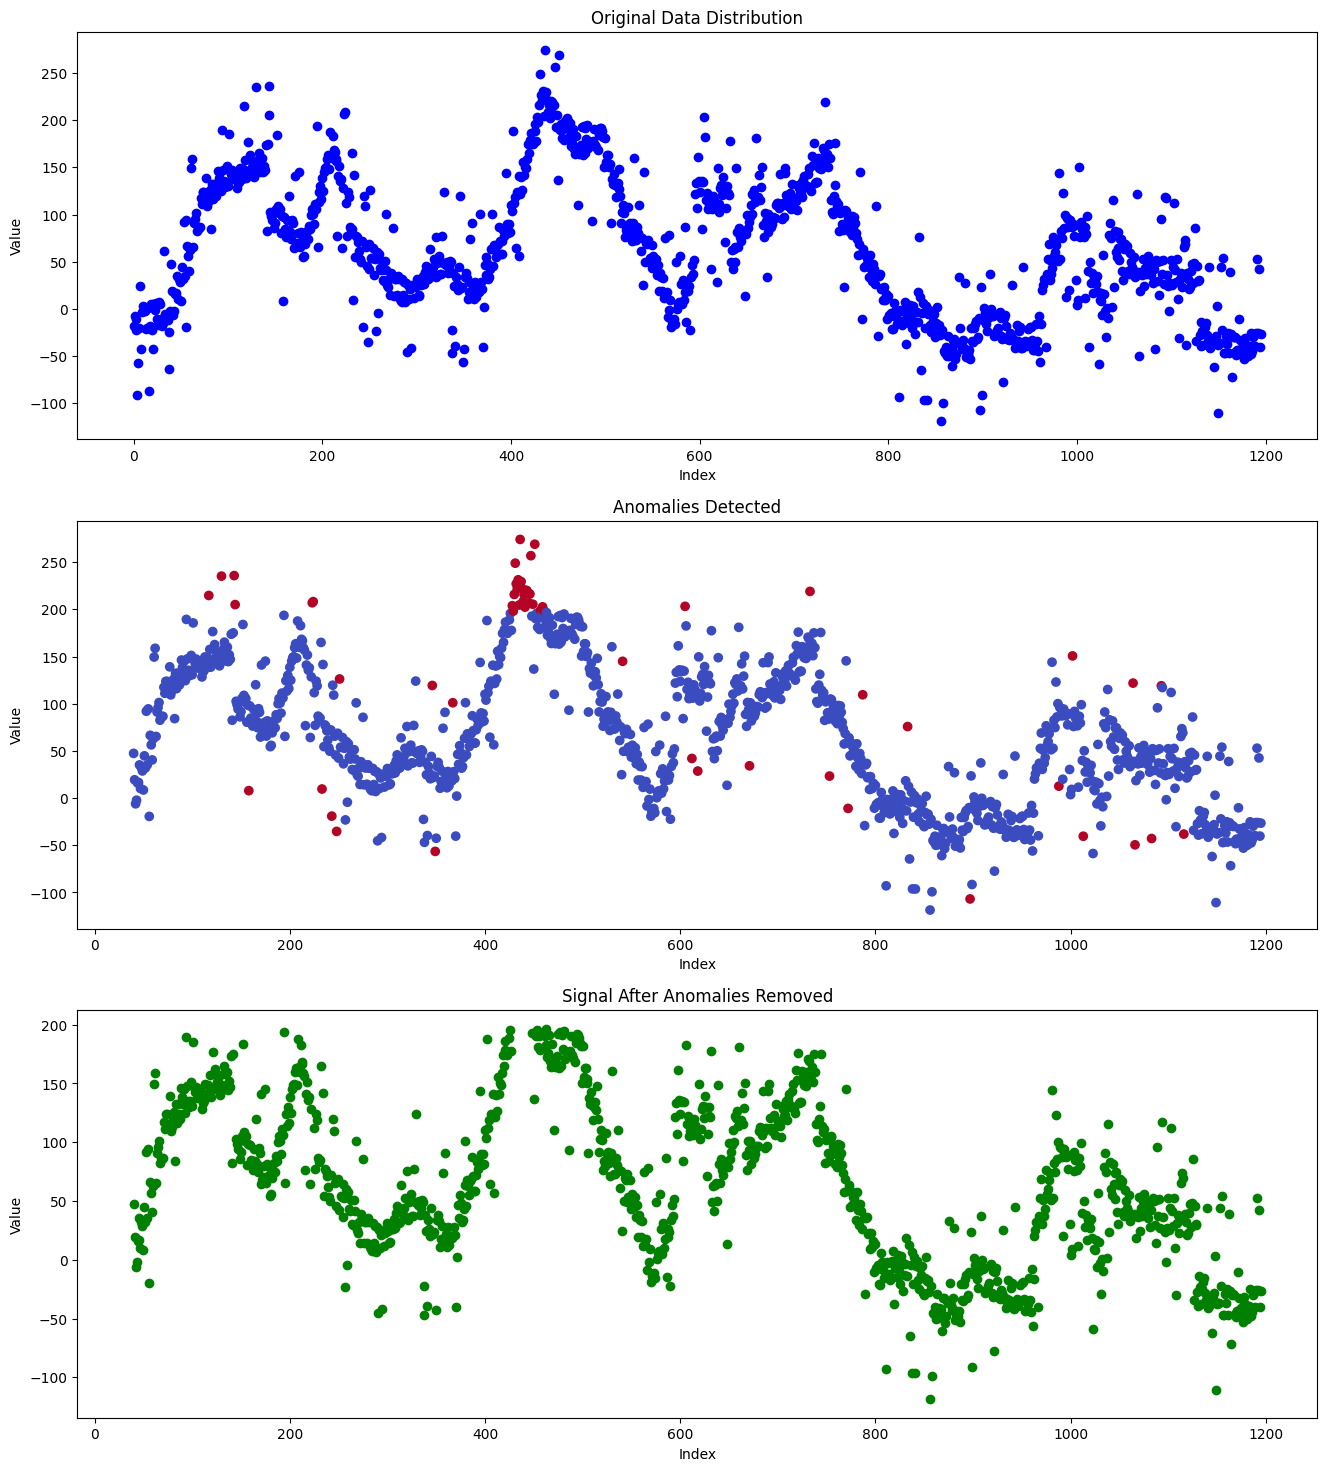

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate synthetic data
# array_with_outliers = generate_trend_with_outliers()
true_outliers = np.zeros_like(array_with_outliers)  # Assuming you have a way to generate true labels

# Reshape data for LSTM
window_size = 40
X = []
for i in range(len(array_with_outliers) - window_size):
    X.append(array_with_outliers[i:i + window_size])
X = np.array(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, array_with_outliers[window_size:], epochs=50, batch_size=16, verbose=0)

# Predict and calculate reconstruction error
predicted = model.predict(X)
mse = np.mean(np.square(predicted - array_with_outliers[window_size:].reshape(-1, 1)), axis=1)
pred_lstm = (mse > np.percentile(mse, 95)).astype(int)

# Calculate metrics
precision_lstm = precision_score(true_outliers[window_size:], pred_lstm, average='weighted')
recall_lstm = recall_score(true_outliers[window_size:], pred_lstm, average='weighted')
f1_lstm = f1_score(true_outliers[window_size:], pred_lstm, average='weighted')

print(f"Precision: {precision_lstm}")
print(f"Recall: {recall_lstm}")
print(f"F1 Score: {f1_lstm}")

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(window_size, len(array_with_outliers)), array_with_outliers[window_size:], c=pred_lstm, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if pred_lstm[i-window_size]==0 else np.nan for i in range(window_size, len(array_with_outliers))])
axs[2].scatter(range(window_size, len(cleaned_signal) + window_size), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

##### without any inlier assumptions

38/38 [==============================] - 0s 2ms/step


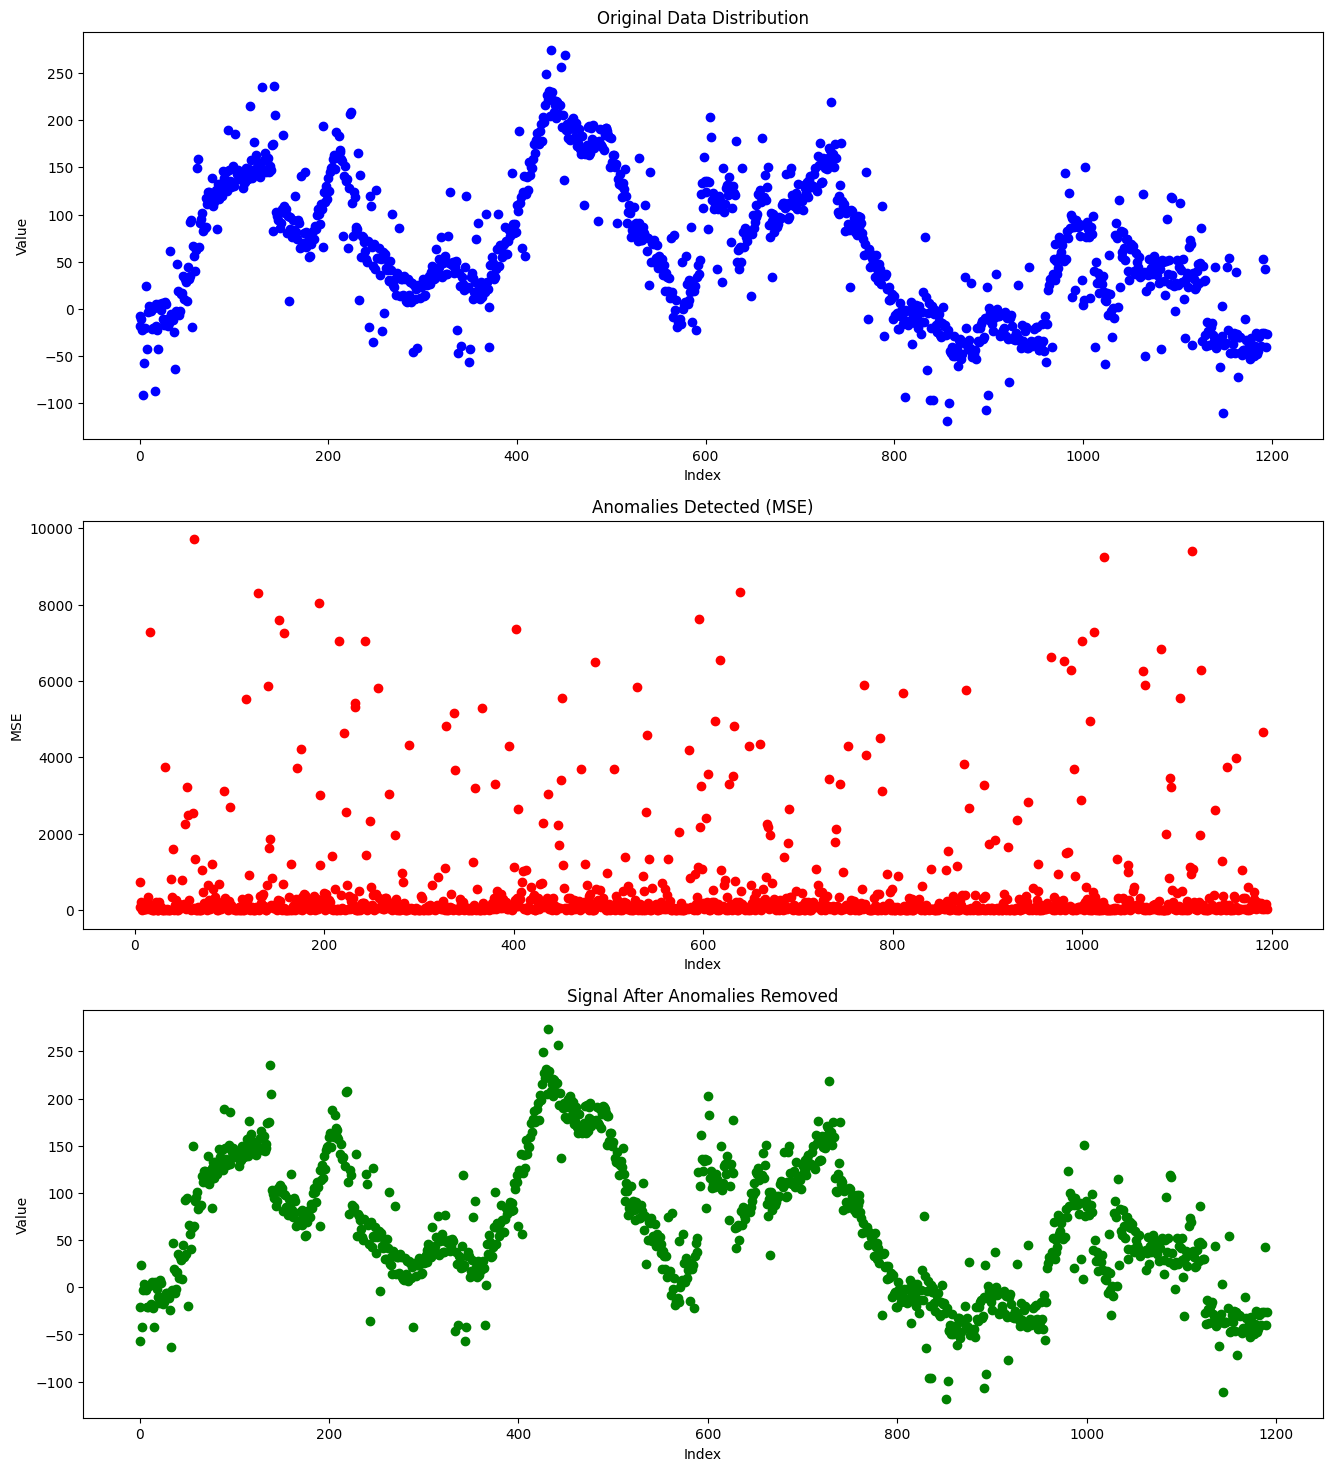

In [ ]:
# without any inlier assumptions
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# # Generate synthetic data
# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()

# Prepare data for LSTM
window_size = 5
X = [array_with_outliers[i:i+window_size] for i in range(len(array_with_outliers)-window_size)]
X = np.array(X)
X = np.expand_dims(X, axis=2)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, array_with_outliers[window_size:], epochs=50, batch_size=16, verbose=0)

# Make predictions
predicted = model.predict(X)
mse = np.mean(np.square(predicted - array_with_outliers[window_size:].reshape(-1, 1)), axis=1)
threshold = np.percentile(mse, 95)
anomalies = (mse > threshold).astype(int)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(window_size, len(array_with_outliers)), mse, c='red')
axs[1].set_title('Anomalies Detected (MSE)')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('MSE')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if anomalies[i-window_size]==0 else np.nan for i in range(window_size, len(array_with_outliers))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

#### Autoencoders + Isolation Forest (With unlabeled data but using a time window split)

- Using Autoencoders + Isolation forests for the parent signal without any labels

2/2 [==============================] - 0s 8ms/step


2/2 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 68ms/step


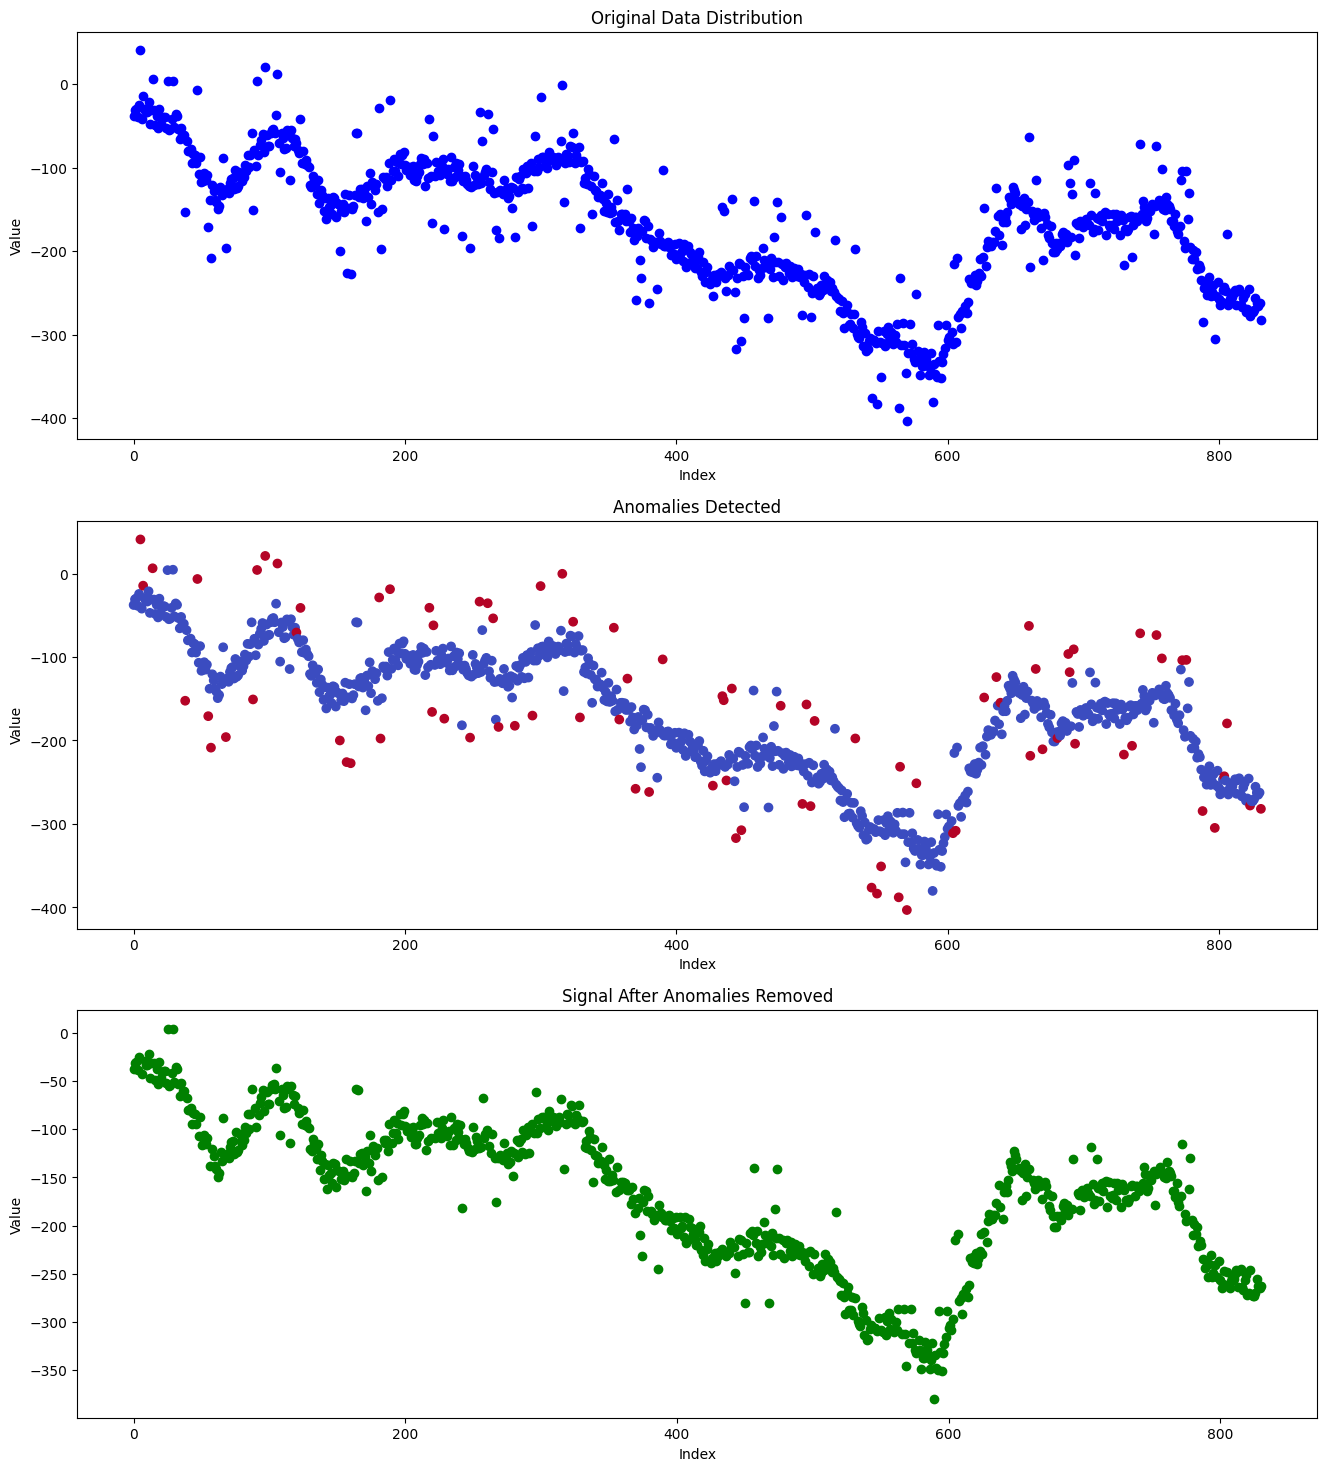

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
import tensorflow as tf
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()
final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    iforest = IsolationForest(contamination=0.1)
    pred_iforest = iforest.fit_predict(window_data.reshape(-1, 1))

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(window_data, window_data, epochs=50, batch_size=16, verbose=0)
    reconstructed = model.predict(window_data)
    mse = np.mean(np.square(reconstructed - window_data.reshape(-1, 1)), axis=1)
    pred_autoencoder = (mse > np.percentile(mse, 95)).astype(int)

    combined_pred = np.logical_or(pred_iforest == -1, pred_autoencoder).astype(int)
    final_pred[i:i + window_size] = combined_pred

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Display the architecture
model.summary()


Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_561 (Dense)           (None, 10)                20        
                                                                 
 dense_562 (Dense)           (None, 5)                 55        
                                                                 
 dense_563 (Dense)           (None, 10)                60        
                                                                 
 dense_564 (Dense)           (None, 1)                 11        
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Isolation Forest (With unlabeled data but using a time window split)

- Using only isolation forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 1.0
Recall: 0.9005016722408027
F1 Score: 0.9476462824461065


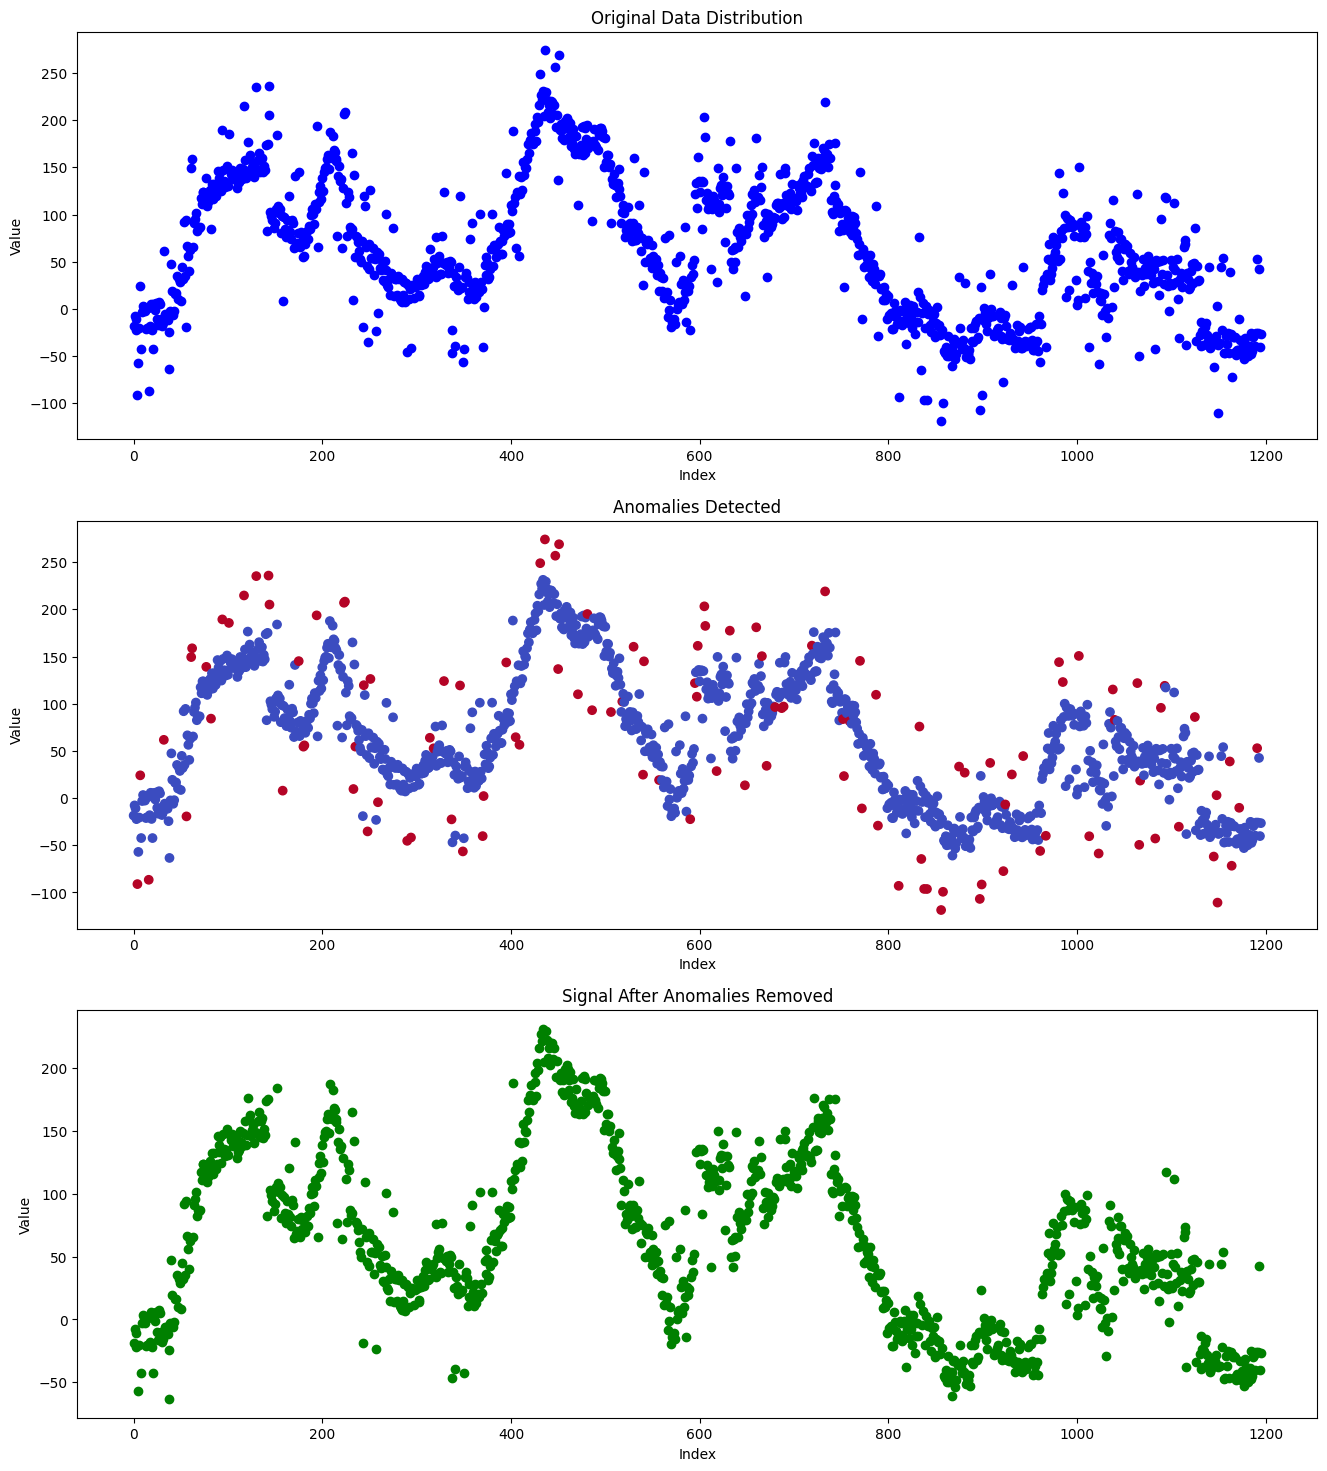

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()
final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    iforest = IsolationForest(contamination=0.1)
    pred_iforest = iforest.fit_predict(window_data.reshape(-1, 1))

    final_pred[i:i + window_size] = (pred_iforest == -1).astype(int)

true_outliers = np.zeros_like(array_with_outliers)
precision_combined = precision_score(true_outliers, final_pred, average='weighted')
recall_combined = recall_score(true_outliers, final_pred, average='weighted')
f1_combined = f1_score(true_outliers, final_pred, average='weighted')

print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

##### without any inlier assumptions -

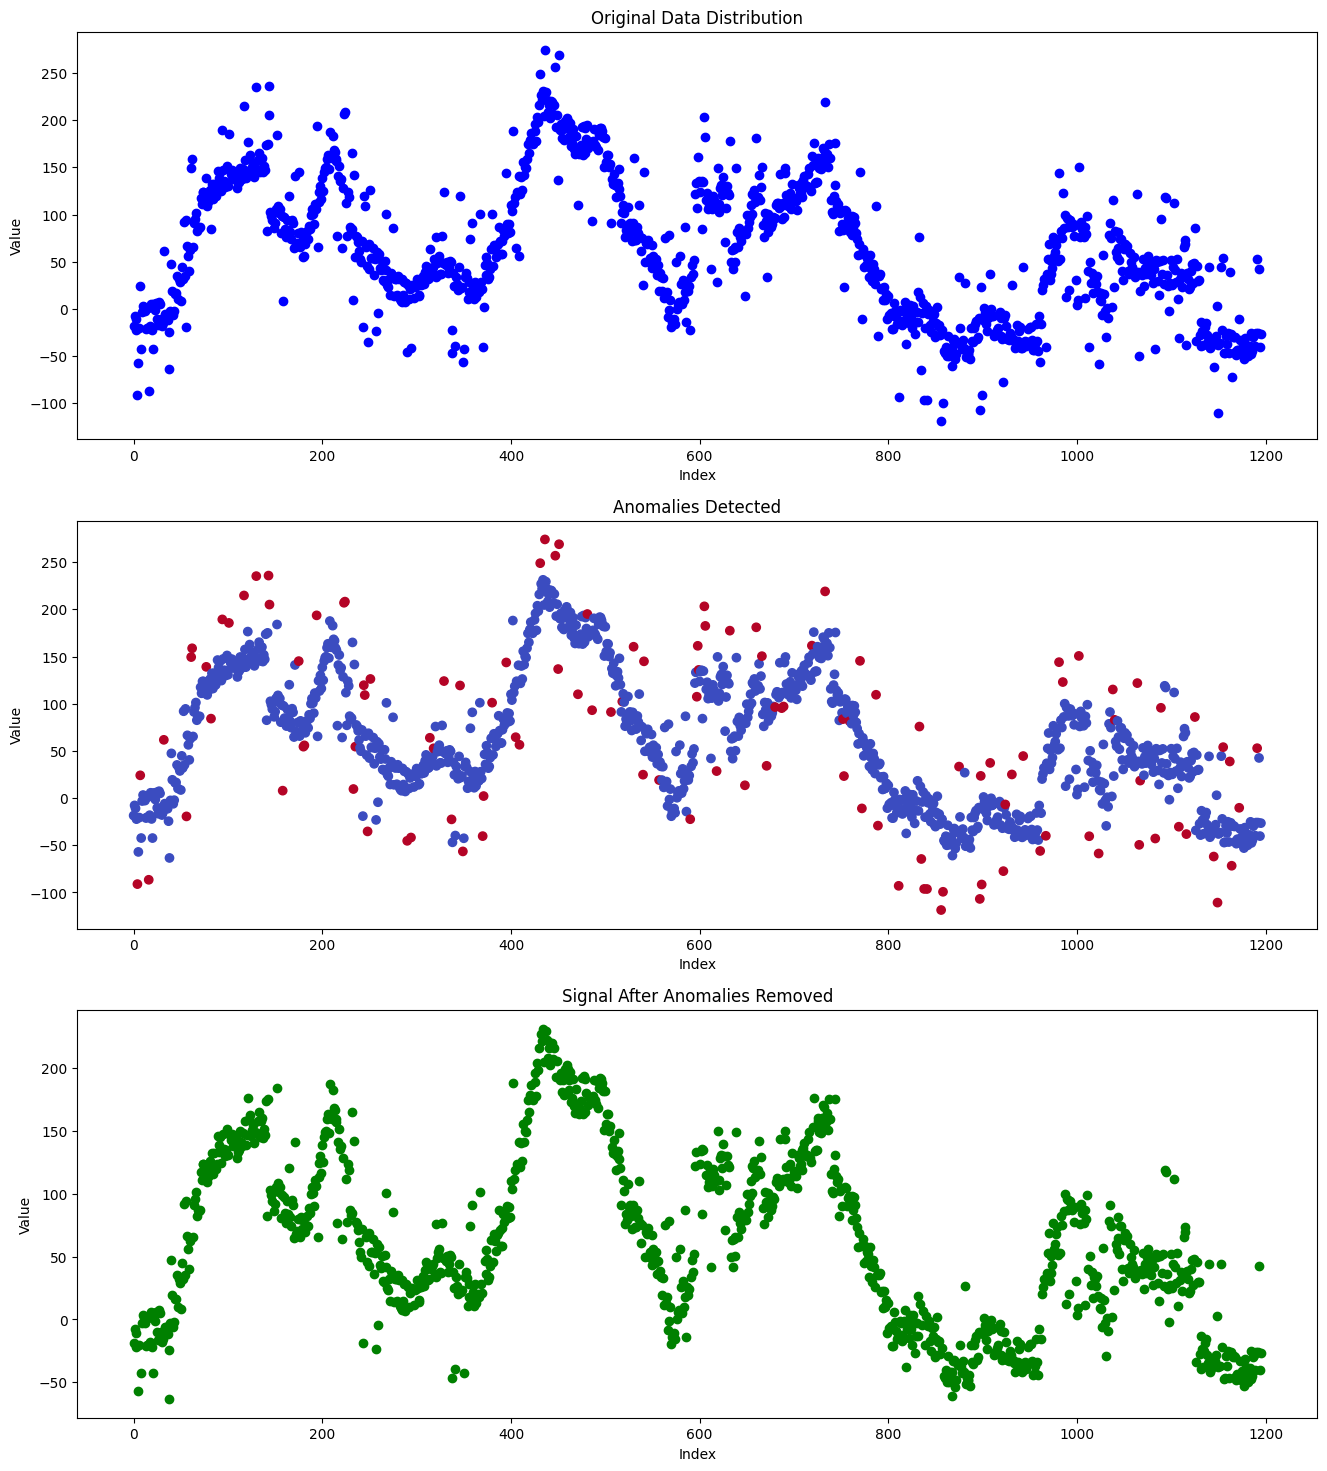

In [ ]:
# without any inlier assumptions -
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()

final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    iforest = IsolationForest(contamination=0.1)
    pred_iforest = iforest.fit_predict(window_data.reshape(-1, 1))

    final_pred[i:i + window_size] = (pred_iforest == -1).astype(int)

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()


#### SVMs (With unlabeled data but using a time window split)

- Only one class SVMs

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 1.0
Recall: 0.8403010033444817
F1 Score: 0.9132212630622444


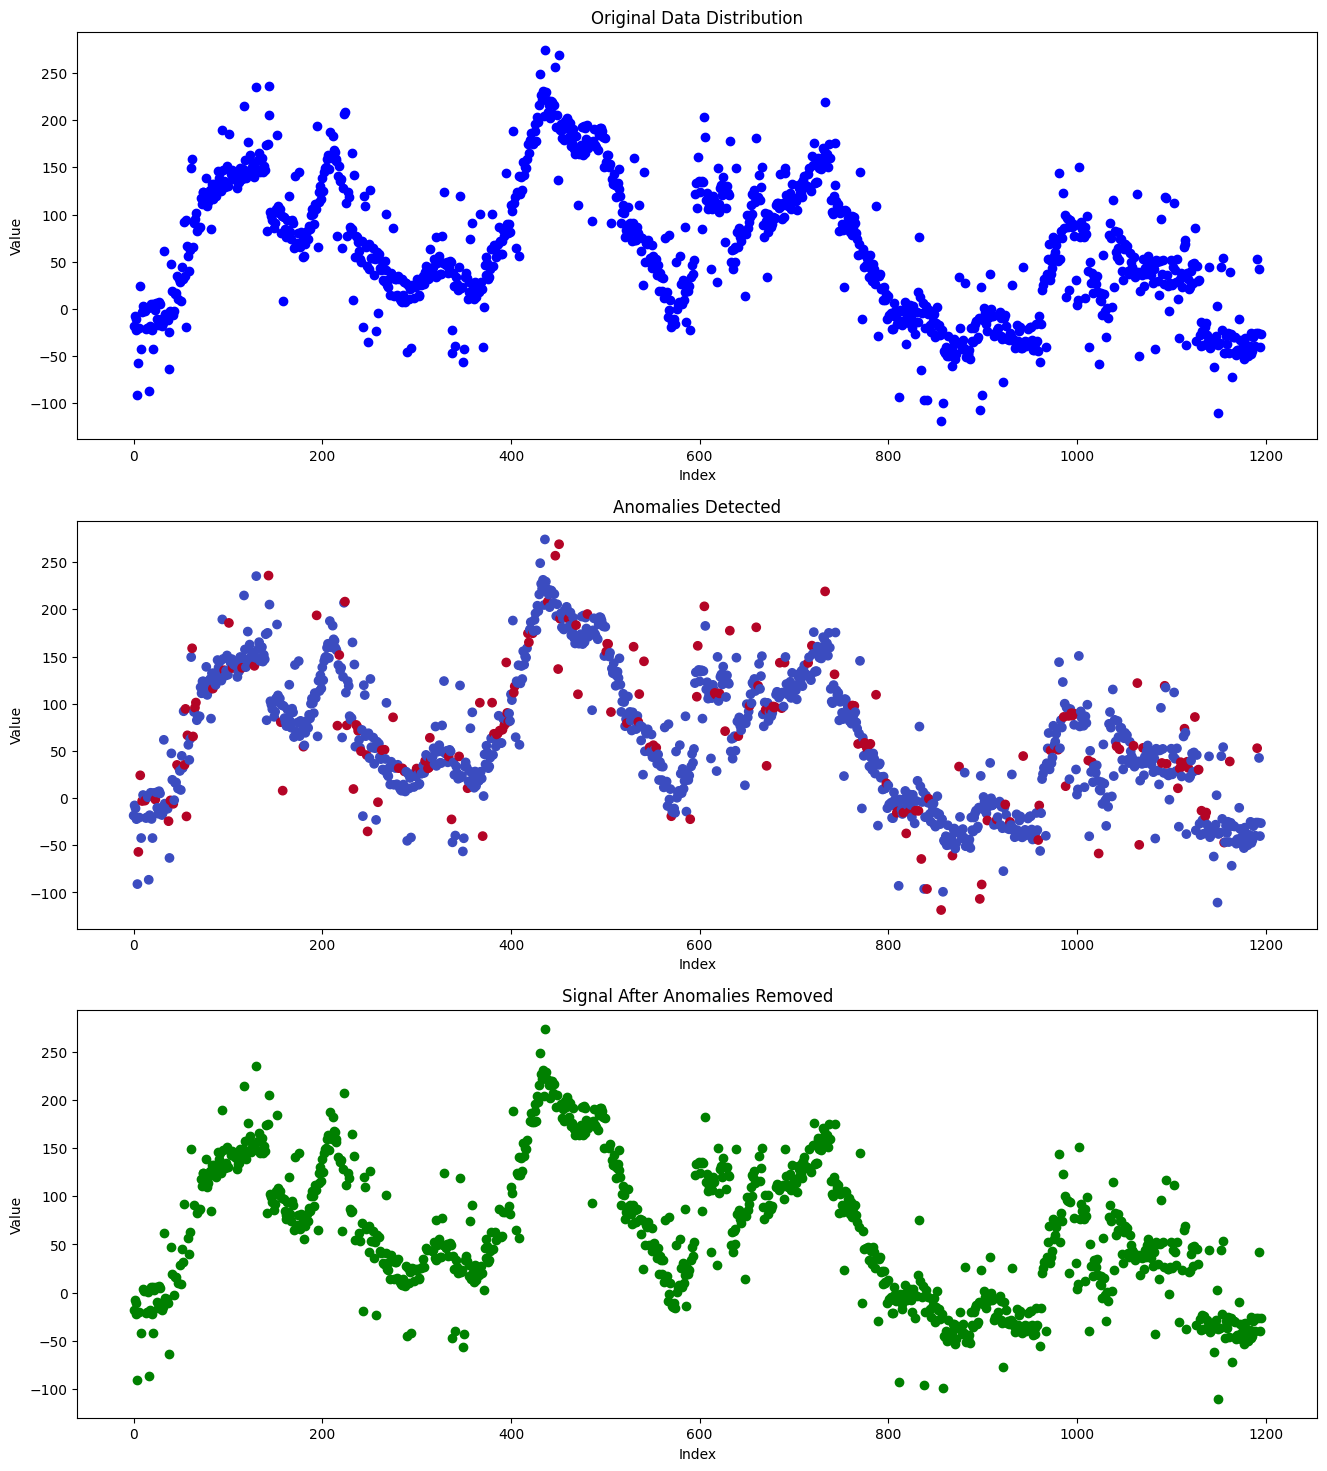

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()
final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    svm = OneClassSVM(nu=0.1)
    pred_svm = svm.fit_predict(window_data.reshape(-1, 1))

    final_pred[i:i + window_size] = (pred_svm == -1).astype(int)

true_outliers = np.zeros_like(array_with_outliers)
precision_combined = precision_score(true_outliers, final_pred, average='weighted')
recall_combined = recall_score(true_outliers, final_pred, average='weighted')
f1_combined = f1_score(true_outliers, final_pred, average='weighted')

print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

##### without any inlier assumptions -

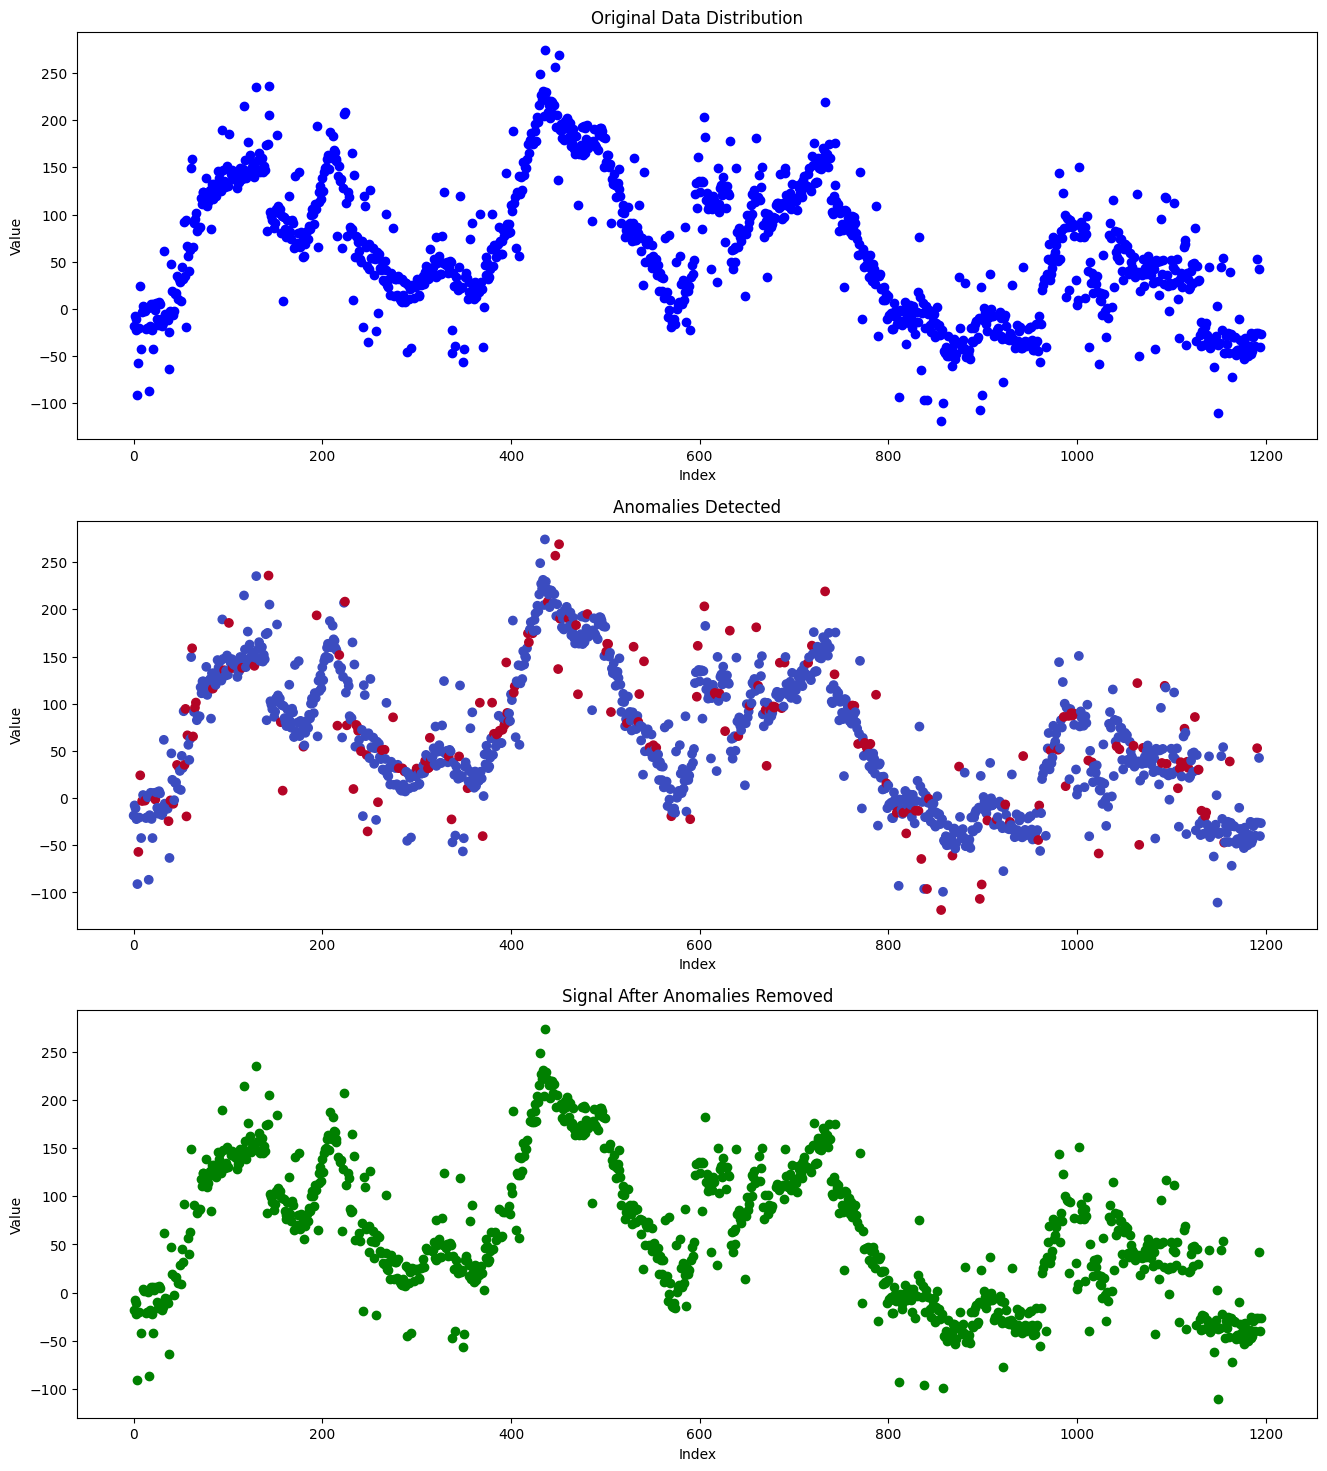

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()
final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    svm = OneClassSVM(nu=0.1)
    pred_svm = svm.fit_predict(window_data.reshape(-1, 1))

    final_pred[i:i + window_size] = (pred_svm == -1).astype(int)

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

#### One class SVMs + Isolation Forest (With unlabeled data but using a time window split)

- Isolation forest + one class SVMs

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 1.0
Recall: 0.7809364548494984
F1 Score: 0.8769953051643192


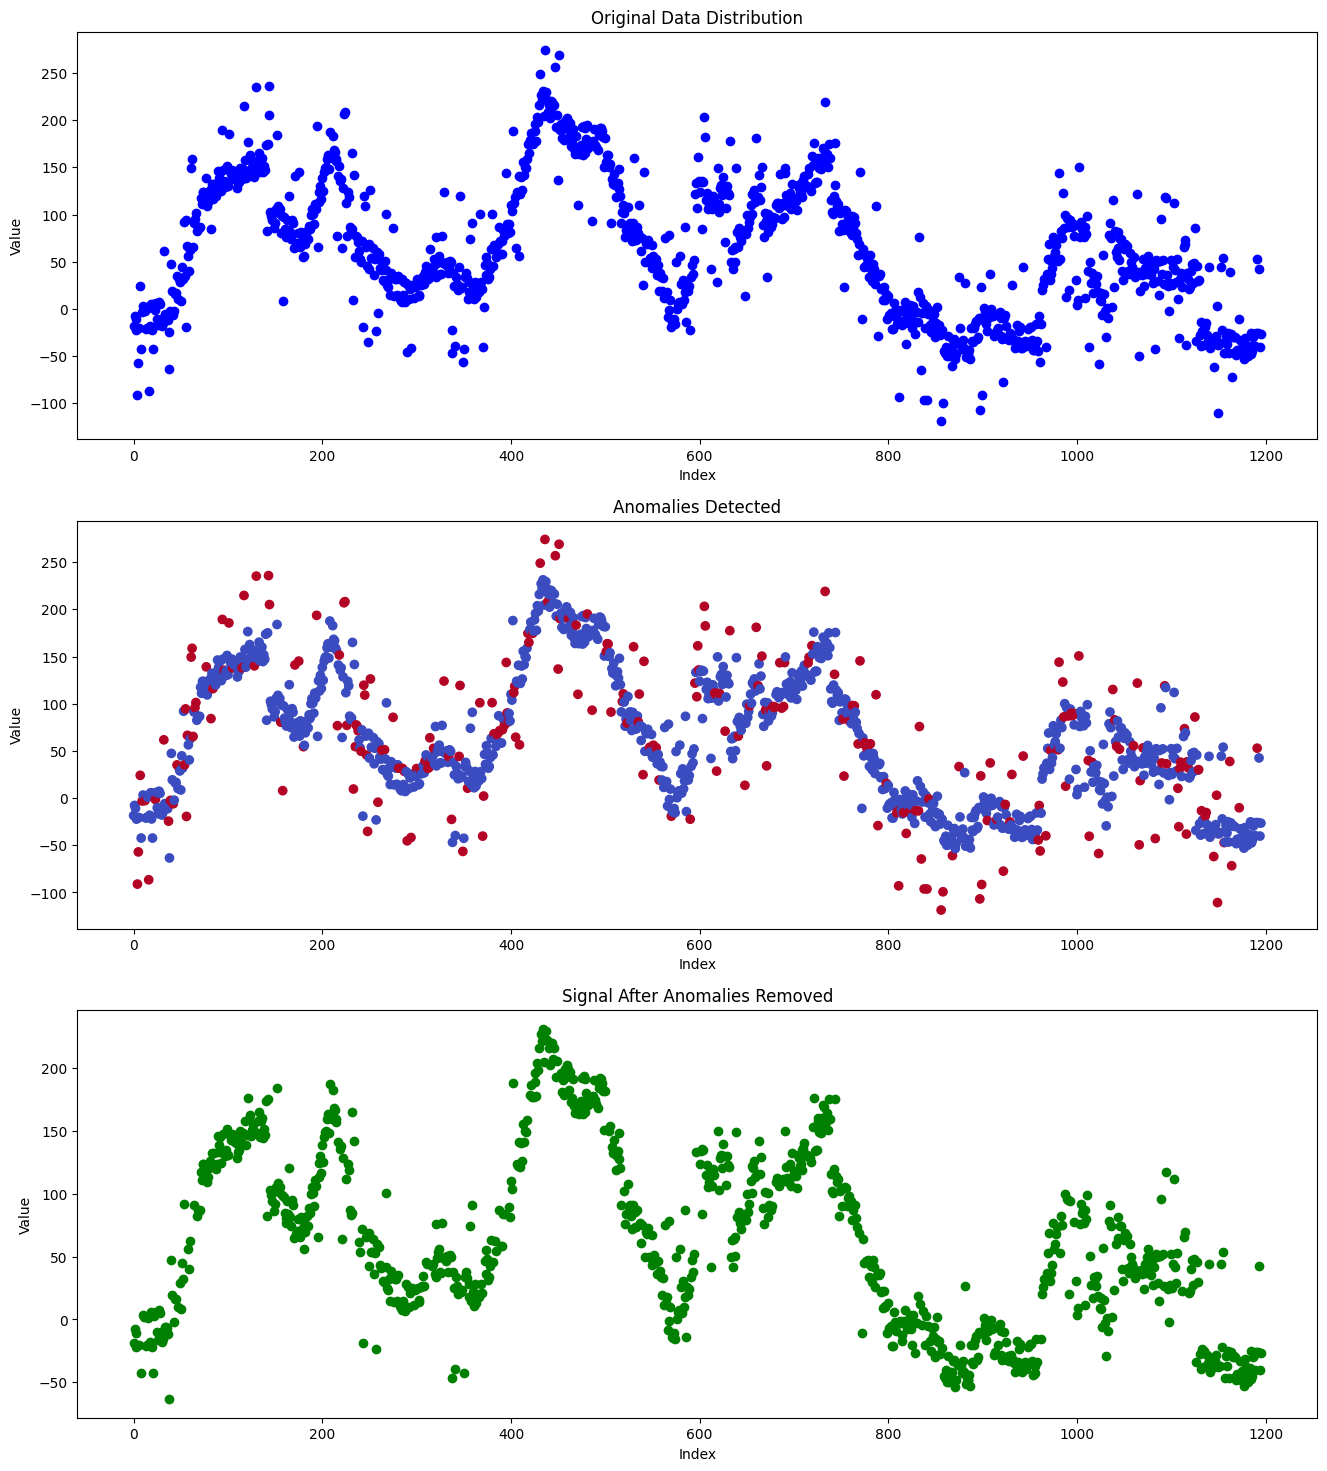

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()

final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    iforest = IsolationForest(contamination=0.1)
    pred_iforest = iforest.fit_predict(window_data.reshape(-1, 1))

    svm = OneClassSVM(nu=0.1)
    pred_svm = svm.fit_predict(window_data.reshape(-1, 1))

    combined_pred = np.logical_or(pred_iforest == -1, pred_svm == -1).astype(int)
    final_pred[i:i + window_size] = combined_pred

true_outliers = np.zeros_like(array_with_outliers)
precision_combined = precision_score(true_outliers, final_pred, average='weighted')
recall_combined = recall_score(true_outliers, final_pred, average='weighted')
f1_combined = f1_score(true_outliers, final_pred, average='weighted')

print(f"Precision: {precision_combined}")
print(f"Recall: {recall_combined}")
print(f"F1 Score: {f1_combined}")

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

##### without any inlier assumptions

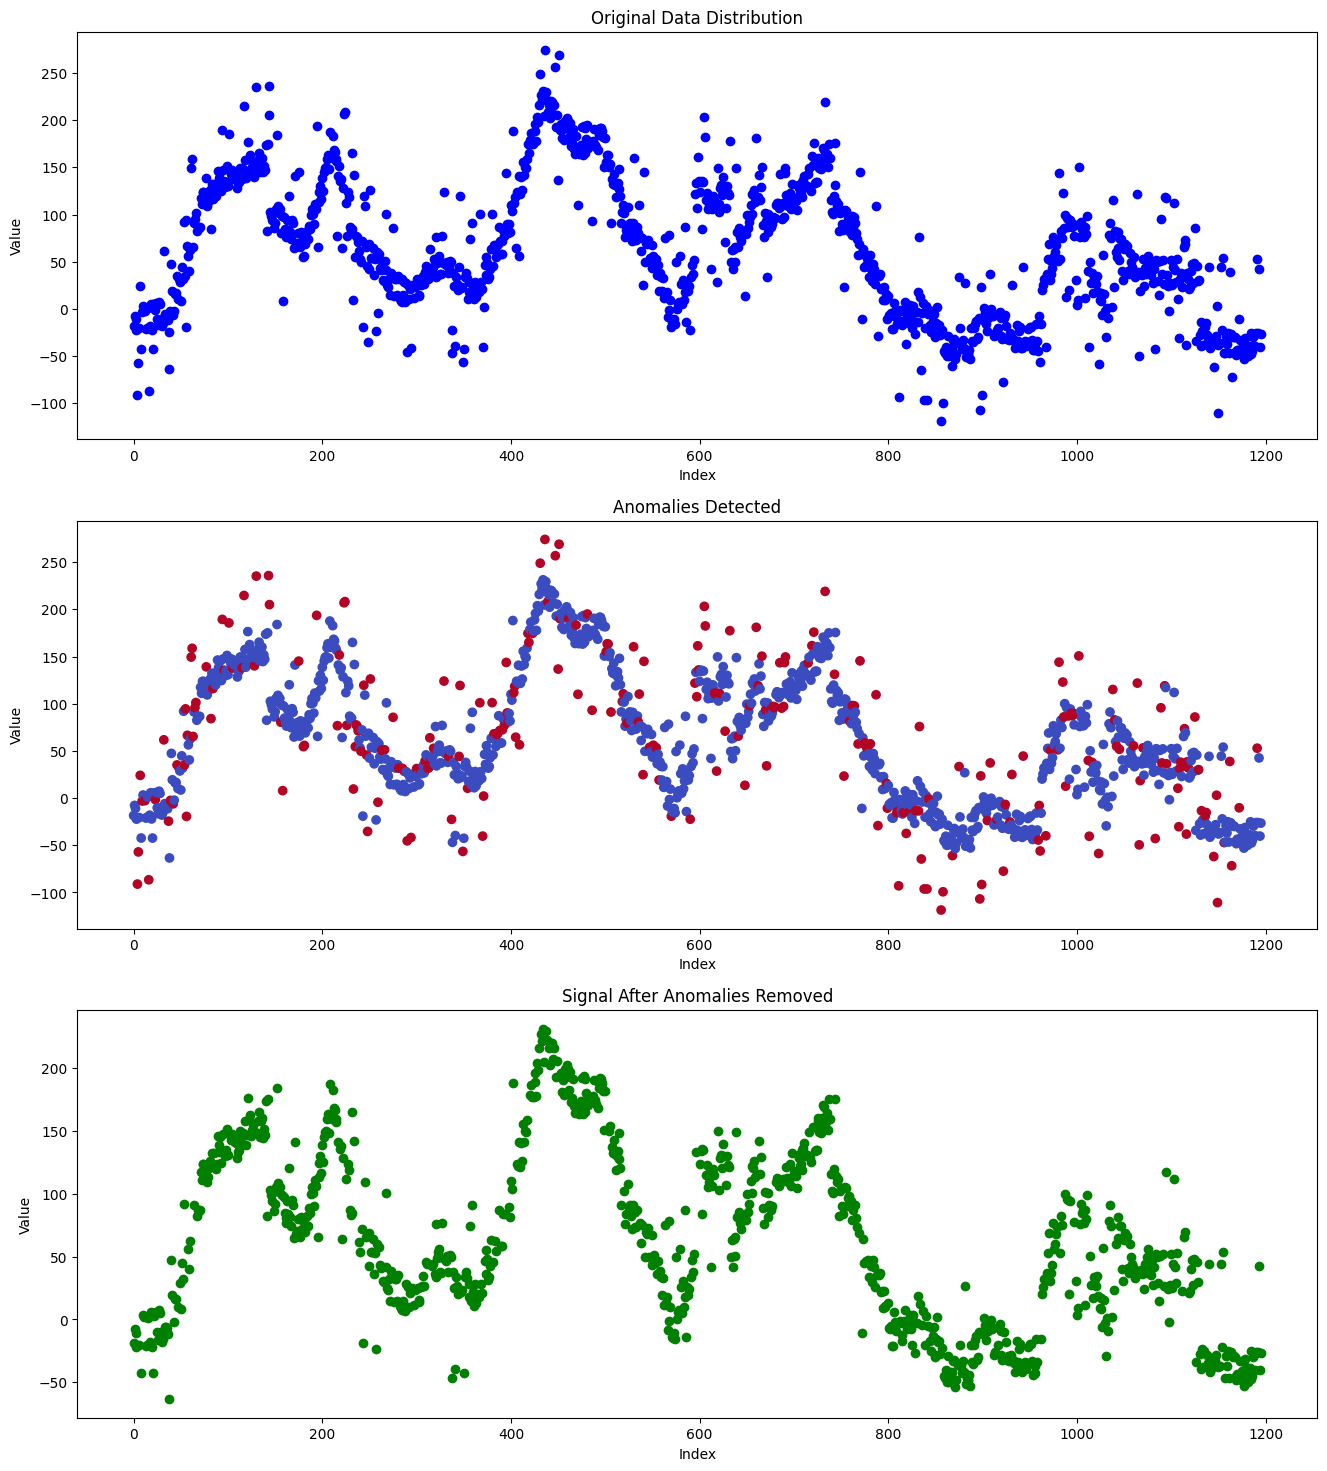

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# def generate_trend_with_outliers():
#     segment_nos = np.random.randint(25,50)
#     slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

#     points=[]
#     constant = (np.random.random()-0.5)*100
#     for i in range(segment_nos):
#         points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
#         constant = points[-1]
#     return np.array(points)

# array_with_outliers = generate_trend_with_outliers()
final_pred = np.zeros_like(array_with_outliers)
window_size = 40

for i in range(0, len(array_with_outliers), window_size):
    window_data = array_with_outliers[i:i + window_size]

    iforest = IsolationForest(contamination=0.1)
    pred_iforest = iforest.fit_predict(window_data.reshape(-1, 1))

    svm = OneClassSVM(nu=0.1)
    pred_svm = svm.fit_predict(window_data.reshape(-1, 1))

    combined_pred = np.logical_or(pred_iforest == -1, pred_svm == -1).astype(int)
    final_pred[i:i + window_size] = combined_pred

fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title('Original Data Distribution')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot anomalies detected
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=final_pred, cmap='coolwarm')
axs[1].set_title('Anomalies Detected')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if final_pred[i]==0 else np.nan for i in range(len(final_pred))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()


#### Unsupervised Learning - DBscan
- Trying a DBScan (shot at unsupervised learning)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate synthetic data and true outlier labels (use your existing function)
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Apply DBSCAN method
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred_dbscan = dbscan.fit_predict(array_with_outliers.reshape(-1, 1))

# Label points as inliers (0) and outliers (1)
pred_dbscan = (pred_dbscan == -1).astype(int)

# Calculate metrics for DBSCAN
precision_dbscan = precision_score(true_outliers, pred_dbscan)
recall_dbscan = recall_score(true_outliers, pred_dbscan)
f1_dbscan = f1_score(true_outliers, pred_dbscan)

print("\nDBSCAN Metrics:")
print(f"Precision: {precision_dbscan}")
print(f"Recall: {recall_dbscan}")
print(f"F1 Score: {f1_dbscan}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs[0].set_title("Original Data")
scatter1 = axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[0].add_artist(legend1)

# Plot data labeled by DBSCAN
axs[1].set_title("DBSCAN")
scatter2 = axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=pred_dbscan, cmap='coolwarm')
legend2 = axs[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[1].add_artist(legend2)

plt.show()

In [ ]:
# Try different hyperparameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

best_f1 = 0
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        pred_dbscan = dbscan.fit_predict(array_with_outliers.reshape(-1, 1))
        pred_dbscan = (pred_dbscan == -1).astype(int)

        f1_dbscan = f1_score(true_outliers, pred_dbscan)

        if f1_dbscan > best_f1:
            best_f1 = f1_dbscan
            best_eps = eps
            best_min_samples = min_samples

print(f"Best F1 Score: {best_f1} with eps: {best_eps} and min_samples: {best_min_samples}")

##### Without labels

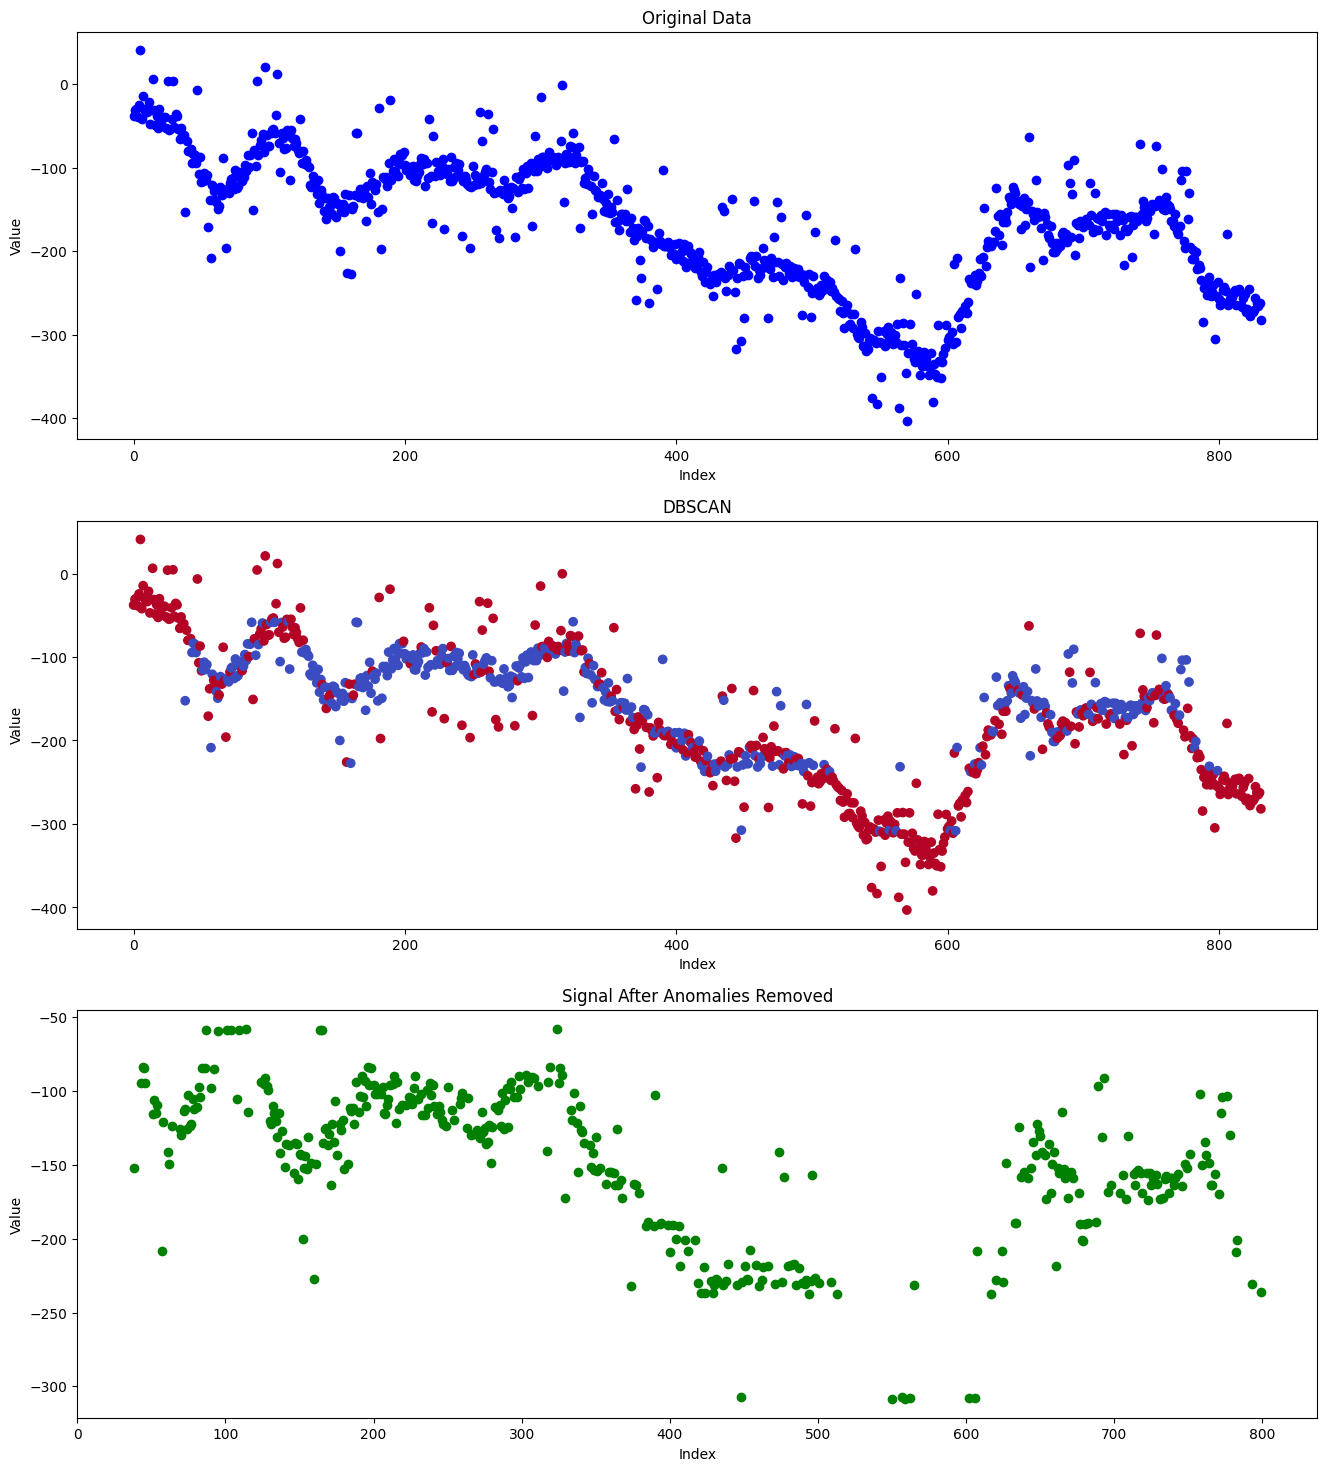

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# # Generate synthetic data
# array_with_outliers = generate_trend_with_outliers()

# Try different hyperparameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        pred_dbscan = dbscan.fit_predict(array_with_outliers.reshape(-1, 1))
        pred_dbscan = (pred_dbscan == -1).astype(int)

        # Here you can add your own logic to evaluate the model
        # For example, you might want to visualize the results to manually inspect them

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].set_title("Original Data")
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot data labeled by DBSCAN
axs[1].set_title("DBSCAN")
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=pred_dbscan, cmap='coolwarm')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if pred_dbscan[i]==0 else np.nan for i in range(len(pred_dbscan))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Value')

plt.show()

## Part 3: Wildcard - Density level set clustering
# *(**time taken - 1 hour** - not to be considered as part of my solution , just adding this for extra points - to demonstrate ability to implement custom algorithms and measuring performance/evaluating the method)*

Steps of the Deli-Clustering algorithm is as follows (there are various adaptations like adaptive deli-clustering etc here we go with a simple approach)

Step 1: Initialization
- A set of unvisited points is initialized, containing all points in the dataset.
- Cluster identifiers and a special identifier for noise points are initialized.
- An empty dictionary for storing clusters is initialized.

Step 2: Cluster Formation
- While there are unvisited points, one point is arbitrarily selected and removed from the set of unvisited points.
- A region query is performed to find all points within a distance `eps` from the selected point.

Step 3: Noise Point Identification
- If the number of neighbors is less than a threshold `minPts`, the point is labeled as noise.

Step 4: Cluster Expansion
- If the number of neighbors is greater than or equal to `minPts`, a new cluster is created, and the cluster is expanded by recursively adding reachable points within `eps` distance and having at least `minPts` neighbors.

Step 5: Cluster Assignment
- Points are assigned to clusters or marked as noise based on the results of the region queries and cluster expansion.




In [ ]:
def deli_clu(data, eps, minPts):
    cluster_id = 0
    noise = -1
    unvisited = set(range(len(data)))
    clusters = {}

    while unvisited:
        point = unvisited.pop()
        neighbors = region_query(data, point, eps)

        if len(neighbors) < minPts:
            clusters.setdefault(noise, []).append(point)
        else:
            cluster_id += 1
            expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited)

    return clusters

def expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited):
    clusters.setdefault(cluster_id, []).append(point)

    while neighbors:
        point = neighbors.pop()

        if point in unvisited:
            unvisited.remove(point)
            new_neighbors = region_query(data, point, eps)

            if len(new_neighbors) >= minPts:
                neighbors.update(new_neighbors)

            clusters.setdefault(cluster_id, []).append(point)

def region_query(data, point, eps):
    return {i for i, other_point in enumerate(data) if distance(point, other_point) <= eps}

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

data = array_with_outliers.reshape(-1, 1)
eps = 0.5
minPts = 5


clusters = deli_clu(data, eps, minPts)

# Convert clusters to labels similar to DBSCAN output
labels = np.zeros(len(data), dtype=int) - 1  # Initialize with noise
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def deli_clu(data, eps, minPts):
    cluster_id = 0
    noise = -1
    unvisited = set(range(len(data)))
    clusters = {}

    while unvisited:
        point = unvisited.pop()
        neighbors = region_query(data, point, eps)

        if len(neighbors) < minPts:
            clusters.setdefault(noise, []).append(point)
        else:
            cluster_id += 1
            expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited)

    return clusters

def expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited):
    clusters.setdefault(cluster_id, []).append(point)

    while neighbors:
        point = neighbors.pop()

        if point in unvisited:
            unvisited.remove(point)
            new_neighbors = region_query(data, point, eps)

            if len(new_neighbors) >= minPts:
                neighbors.update(new_neighbors)

            clusters.setdefault(cluster_id, []).append(point)

def region_query(data, point, eps):
    return {i for i, other_point in enumerate(data) if distance(point, other_point) <= eps}

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

data = array_with_outliers.reshape(-1, 1)
eps = 0.5
minPts = 5


clusters = deli_clu(data, eps, minPts)

# Convert clusters to labels similar to DBSCAN output
labels = np.zeros(len(data), dtype=int) - 1  # Initialize with noise
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Your data and parameters
data = array_with_outliers.reshape(-1, 1)
eps = 0.5
minPts = 5

# Run DeLi-Clu
clusters = deli_clu(data, eps, minPts)

# Convert clusters to labels similar to DBSCAN output
labels = np.zeros(len(data), dtype=int) - 1  # Initialize with noise
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Assuming `true_outliers` are the ground truth labels
# Convert your ground truth to a similar format as your `labels`
# For example, you might want to set all outliers as -1 and inliers as some positive integer

# Calculate metrics
precision_deli_clu = precision_score(true_outliers, labels, average='weighted')
recall_deli_clu = recall_score(true_outliers, labels, average='weighted')
f1_deli_clu = f1_score(true_outliers, labels, average='weighted')

print("\nDeLi-Clu Metrics:")
print(f"Precision: {precision_deli_clu}")
print(f"Recall: {recall_deli_clu}")
print(f"F1 Score: {f1_deli_clu}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'array_with_outliers' contains your data points and 'true_outliers' contains the true labels
# Assuming 'labels' contains your DeLi-Clu labels

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs[0].set_title("Original Data")
scatter1 = axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
legend1 = axs[0].legend(handles=scatter1.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[0].add_artist(legend1)

# Plot data labeled by DeLi-Clu
axs[1].set_title("DeLi-Clu")
scatter2 = axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')
legend2 = axs[1].legend(handles=scatter2.legend_elements()[0], labels=['0 (Inlier)', '1 (Outlier)'], title="Labels")
axs[1].add_artist(legend2)

plt.show()


Deli-Clu is actually for spatial data therefore for 1D data it requires a few changes.

- Modified the `region_query` function to use the absolute difference for distance calculation, which is more suitable for one-dimensional data.
- Changed the way labels are assigned to points. I used a NumPy array initialized with -1 (indicating noise) and then filled it with cluster IDs. This is more aligned with how DBSCAN and similar algorithms usually output their labels.


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def deli_clu(data, eps, minPts):
    cluster_id = 0
    noise = -1
    unvisited = set(range(len(data)))
    clusters = {}

    while unvisited:
        point = unvisited.pop()
        neighbors = region_query(data, point, eps)

        if len(neighbors) < minPts:
            clusters.setdefault(noise, []).append(point)
        else:
            cluster_id += 1
            expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited)

    return clusters

def expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited):
    clusters.setdefault(cluster_id, []).append(point)

    while neighbors:
        point = neighbors.pop()

        if point in unvisited:
            unvisited.remove(point)
            new_neighbors = region_query(data, point, eps)

            if len(new_neighbors) >= minPts:
                neighbors.update(new_neighbors)

            clusters.setdefault(cluster_id, []).append(point)

def region_query(data, point, eps):
    return {i for i, other_point in enumerate(data) if np.abs(other_point - data[point]) <= eps}

# Generate synthetic data and true outlier labels
# Replace this with your own data generation function
array_with_outliers, true_outliers = np.random.rand(100, 1), np.random.randint(0, 2, 100)

# Parameters
eps = 0.1
minPts = 5

# Run DeLi-Clu
clusters = deli_clu(array_with_outliers, eps, minPts)


labels = np.full(len(array_with_outliers), -1)
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id


precision_deli_clu = precision_score(true_outliers, labels, average='micro')
recall_deli_clu = recall_score(true_outliers, labels, average='micro')
f1_deli_clu = f1_score(true_outliers, labels, average='micro')

print("\nDeLi-Clu Metrics:")
print(f"Precision: {precision_deli_clu}")
print(f"Recall: {recall_deli_clu}")
print(f"F1 Score: {f1_deli_clu}")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
axs[0].set_title("Original Data")

# Plot DeLi-Clu labeled data
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')
axs[1].set_title("DeLi-Clu Labeled Data")

plt.show()

In [ ]:
def generate_synthetic_data_with_labels():
    return np.random.rand(100, 1), np.random.randint(0, 2, 100)

# Generate a new synthetic dataset and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Run DeLi-Clu on the new dataset
eps = 0.1
minPts = 5
clusters = deli_clu(array_with_outliers, eps, minPts)

# Convert clusters to labels
labels = np.full(len(array_with_outliers), -1)
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Calculate performance metrics
precision_deli_clu = precision_score(true_outliers, labels, average='micro')
recall_deli_clu = recall_score(true_outliers, labels, average='micro')
f1_deli_clu = f1_score(true_outliers, labels, average='micro')

print("\nDeLi-Clu Metrics:")
print(f"Precision: {precision_deli_clu}")
print(f"Recall: {recall_deli_clu}")
print(f"F1 Score: {f1_deli_clu}")

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs[0].set_title("Original Data")
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')

# Plot data labeled by DeLi-Clu
axs[1].set_title("DeLi-Clu")
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')

plt.show()

In [ ]:
def generate_synthetic_data_with_labels():
    return np.random.rand(100, 1), np.random.randint(0, 2, 100)

# Generate a new synthetic dataset and true outlier labels
array_with_outliers, true_outliers = generate_synthetic_data_with_labels()

# Run DeLi-Clu on the new dataset
eps = 0.1
minPts = 5
clusters = deli_clu(array_with_outliers, eps, minPts)

# Convert clusters to labels
labels = np.full(len(array_with_outliers), -1)
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Calculate performance metrics
precision_deli_clu = precision_score(true_outliers, labels, average='micro')
recall_deli_clu = recall_score(true_outliers, labels, average='micro')
f1_deli_clu = f1_score(true_outliers, labels, average='micro')

print("\nDeLi-Clu Metrics:")
print(f"Precision: {precision_deli_clu}")
print(f"Recall: {recall_deli_clu}")
print(f"F1 Score: {f1_deli_clu}")

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot original data
axs[0].set_title("Original Data")
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')

# Plot data labeled by DeLi-Clu
axs[1].set_title("DeLi-Clu")
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].set_title("Original Data")
scatter1 = axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c=true_outliers, cmap='coolwarm')
for i, txt in enumerate(true_outliers):
    if txt == 1:
        axs[0].scatter(i, array_with_outliers[i], facecolors='none', edgecolors='r', s=100)

axs[1].set_title("DeLi-Clu")
scatter2 = axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')
for i, txt in enumerate(labels):
    if txt == -1:
        axs[1].scatter(i, array_with_outliers[i], facecolors='none', edgecolors='r', s=100)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def generate_trend_with_outliers():
    segment_nos = np.random.randint(25,50)
    slopes = [np.tan((np.random.random()-0.5)*2.7) for i in range(segment_nos)]

    points=[]
    constant = (np.random.random()-0.5)*100
    for i in range(segment_nos):
        points += [constant+(slopes[i]*j)+ 30*(np.random.random()-0.5)*(1+5*(np.random.random()>0.8)) for j in range(1,np.random.randint(20,41))]
        constant = points[-1]
    return np.array(points)

# Generate trend with outliers
array_with_outliers = generate_trend_with_outliers()

# Apply DeLi-Clu
clusters = deli_clu(array_with_outliers.reshape(-1, 1), 0.5, 5)

# Convert clusters to labels
labels = np.zeros(len(array_with_outliers), dtype=int) - 1
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Generate true_outliers for comparison (you'll need to replace this with your actual labels)
true_outliers = np.zeros(len(array_with_outliers), dtype=int)

# Calculate metrics
precision_deli_clu = precision_score(true_outliers, labels)
recall_deli_clu = recall_score(true_outliers, labels)
f1_deli_clu = f1_score(true_outliers, labels)

print("\nDeLi-Clu Metrics:")
print(f"Precision: {precision_deli_clu}")
print(f"Recall: {recall_deli_clu}")
print(f"F1 Score: {f1_deli_clu}")

# Plotting
plt.figure(figsize=(16, 6))
plt.title("DeLi-Clu Outlier Detection")
plt.scatter(range(len(array_with_outliers)), array_with_outliers, c='blue', label='Data Points')
outlier_indices = np.where(labels == -1)[0]
plt.scatter(outlier_indices, array_with_outliers[outlier_indices], c='red', label='Outliers', edgecolors='k')
plt.legend()
plt.show()

##### final cut

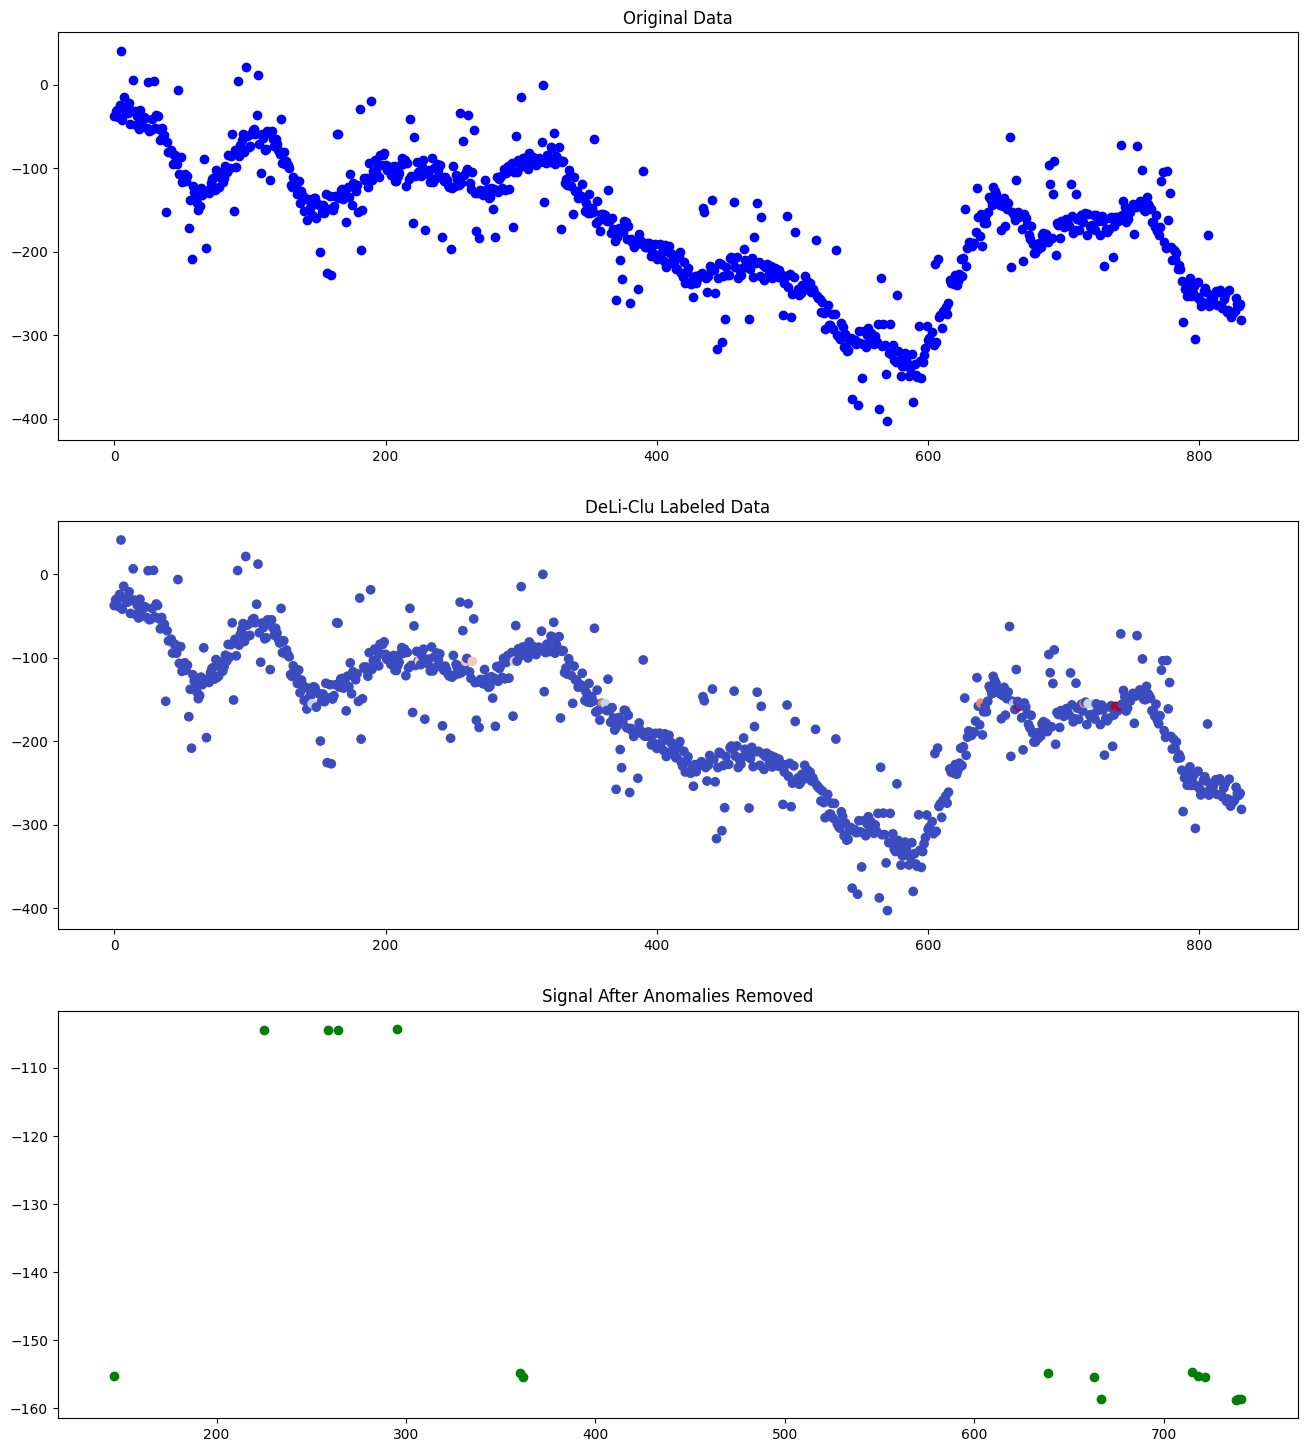

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def deli_clu(data, eps, minPts):
    cluster_id = 0
    noise = -1
    unvisited = set(range(len(data)))
    clusters = {}

    while unvisited:
        point = unvisited.pop()
        neighbors = region_query(data, point, eps)

        if len(neighbors) < minPts:
            clusters.setdefault(noise, []).append(point)
        else:
            cluster_id += 1
            expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited)

    return clusters

def expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited):
    clusters.setdefault(cluster_id, []).append(point)

    while neighbors:
        point = neighbors.pop()

        if point in unvisited:
            unvisited.remove(point)
            new_neighbors = region_query(data, point, eps)

            if len(new_neighbors) >= minPts:
                neighbors.update(new_neighbors)

            clusters.setdefault(cluster_id, []).append(point)

def region_query(data, point, eps):
    return {i for i, other_point in enumerate(data) if np.abs(other_point - data[point]) <= eps}

# # Generate synthetic data
# array_with_outliers = np.random.rand(100, 1)

# Parameters
eps = 0.1
minPts = 5

# Run DeLi-Clu
clusters = deli_clu(array_with_outliers, eps, minPts)

labels = np.full(len(array_with_outliers), -1)
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title("Original Data")

# Plot DeLi-Clu labeled data
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')
axs[1].set_title("DeLi-Clu Labeled Data")

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if labels[i] != -1 else np.nan for i in range(len(labels))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title('Signal After Anomalies Removed')

plt.show()


In [ ]:
# optimized using Grid Search (just a shot)

import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def deli_clu(data, eps, minPts):
    cluster_id = 0
    noise = -1
    unvisited = set(range(len(data)))
    clusters = {}

    while unvisited:
        point = unvisited.pop()
        neighbors = region_query(data, point, eps)

        if len(neighbors) < minPts:
            clusters.setdefault(noise, []).append(point)
        else:
            cluster_id += 1
            expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited)

    return clusters

def expand_cluster(data, clusters, point, neighbors, cluster_id, eps, minPts, unvisited):
    clusters.setdefault(cluster_id, []).append(point)

    while neighbors:
        point = neighbors.pop()

        if point in unvisited:
            unvisited.remove(point)
            new_neighbors = region_query(data, point, eps)

            if len(new_neighbors) >= minPts:
                neighbors.update(new_neighbors)

            clusters.setdefault(cluster_id, []).append(point)

def region_query(data, point, eps):
    return {i for i, other_point in enumerate(data) if np.linalg.norm(other_point.reshape(-1) - data[point].reshape(-1)) <= eps}

# # Generate synthetic data (replace this with your own data generation function)
# array_with_outliers = np.random.rand(100, 1)

# Hyperparameter optimization
eps_values = [0.1, 0.2, 0.3]
minPts_values = [5, 10, 15]
best_eps = 0
best_minPts = 0
best_silhouette = -1

for eps in eps_values:
    for minPts in minPts_values:
        clusters = deli_clu(array_with_outliers, eps, minPts)
        labels = np.full(len(array_with_outliers), -1)
        for cluster_id, points in clusters.items():
            for point in points:
                labels[point] = cluster_id
        silhouette_avg = silhouette_score(array_with_outliers, labels)
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_minPts = minPts

# Run DeLi-Clu with best parameters
clusters = deli_clu(array_with_outliers, best_eps, best_minPts)

labels = np.full(len(array_with_outliers), -1)
for cluster_id, points in clusters.items():
    for point in points:
        labels[point] = cluster_id

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot original data
axs[0].scatter(range(len(array_with_outliers)), array_with_outliers, c='blue')
axs[0].set_title("Original Data")

# Plot DeLi-Clu labeled data
axs[1].scatter(range(len(array_with_outliers)), array_with_outliers, c=labels, cmap='coolwarm')
axs[1].set_title(f"DeLi-Clu Labeled Data (eps={best_eps}, minPts={best_minPts})")

# Plot signal after anomalies have been removed
cleaned_signal = np.array([array_with_outliers[i] if labels[i] != -1 else np.nan for i in range(len(labels))])
axs[2].scatter(range(len(cleaned_signal)), cleaned_signal, c='green')
axs[2].set_title("Signal After Anomalies Removed")

plt.show()


ValueError: ignored